In [1]:
from keras.models import load_model

encoder_model = load_model("latest_latest.h5")
encoder_model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)            │ (None, 1, 1412)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1, 1412)        │     1,995,156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1, 1024)        │     1,446,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1, 512)         │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1, 256)         │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1, 128)         │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1, 64)          │         8,256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,139,348 (15.79 MB)

 Trainable params: 4,139,348 (15.79 MB)

 Non-trainable params: 0 (0.00 B)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('aug_weathered_5plastics_baselineCorr.csv')

In [3]:
data

filename plastic  200.4755491  203.3592491  206.2419365  209.1236123  \
0    wea-100.txt     PET    34.805892    37.046772    35.535303    46.521485   
1    wea-100.txt     PET    29.999536    42.213728    35.249841    51.735067   
2    wea-100.txt     PET    39.329251    39.031658    31.673667    45.005801   
3    wea-100.txt     PET    39.420711    41.675967    39.194583    41.131913   
4    wea-100.txt     PET    40.123708    42.377817    31.372748    47.216699   
..           ...     ...          ...          ...          ...          ...   
330   wea-95.txt      PE  1344.879053  1331.705277  1333.034862  1353.367809   
331   wea-96.txt      PE   156.485810   164.038470   139.341286   164.394260   
332   wea-97.txt      PE   671.667105   673.378725   677.841527   661.805510   
333   wea-98.txt      PE  1399.324984  1393.743418  1399.414258  1395.337502   
334   wea-99.txt      PP    11.755117    26.234500    20.463750    18.442866   

     212.0042772  214.8839322  217.7625781  220.6402157  ...  3478.749316  \
0      39.755317    59.986800    47.465935    46.692720  ...   -31.351409   
1      35.016284    55.064513    42.608214    41.840817  ...   -27.996122   
2      37.042937    54.606790    42.861014    44.276963  ...   -17.436543   
3      36.278642    55.411802    44.339141    41.324296  ...   -16.819405   
4      35.103545    65.440754    48.422044    44.204533  ...   -24.556585   
..           ...          ...          ...          ...  ...          ...   
330  1336.704117  1315.793787  1315.636819  1325.983211  ...   647.110917   
331   160.197392   158.500680   140.304126   152.107728  ...   -47.770967   
332   666.270675   658.487021   658.454549   661.423259  ...   236.547502   
333  1393.013150  1385.441204  1386.871662  1372.804525  ...   846.949900   
334    22.921849    24.400698    19.879414    12.607996  ...   -16.027559   

     3480.652831  3482.555849  3484.458372   3486.3604  3488.261932  \
0      13.595936    -5.459068   -38.266421  -38.076123   -16.388174   
1       9.801231    -9.373153   -41.172865  -25.466052   -23.123276   
2      -1.728467     4.133912   -43.579183  -24.150868   -28.465674   
3       2.358965     9.225311   -38.736534  -29.546008    -8.286694   
4       2.876364    -8.102570   -42.578375  -25.225534   -22.134593   
..           ...          ...          ...         ...          ...   
330   617.650011   630.692468   638.988286  590.787465   599.840006   
331   -12.747872    20.525379   -11.951212  -23.927646    -9.903923   
332   245.415709   233.035098   216.905668  226.277420   221.400353   
333   822.989826   872.782157   833.326892  811.874032   810.423577   
334    -4.235367    -9.943310   -19.651385  -19.359594     8.932063   

     3490.16297  3492.063513  3493.963561  3495.863115  
0    -83.202575   -81.769324   -68.838423   -19.909871  
1    -90.706927   -86.423906   -61.914312    -9.869929  
2    -73.843070   -68.029464   -64.466839   -24.398344  
3    -77.135276   -77.191407   -73.175284   -19.427360  
4    -69.120372   -72.077336   -79.238890   -30.568327  
..          ...          ...          ...          ...  
330  583.145908   585.205172   641.767798   638.333785  
331  -63.880042   -19.856004   -33.081809    -3.807457  
332  200.024468   213.149764   250.276242   244.153902  
333  774.725527   830.779882   871.336641   802.895805  
334   -5.526413   -24.735023   -13.193766    -3.152643  

[335 rows x 1414 columns]

In [4]:
data['plastic'].value_counts()

plastic
PE     72
PA     72
PET    70
PVC    70
PP     51
Name: count, dtype: int64

In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))  # Normalize between 0 and 1

remove_classes = ["PS", "PC", "NC", "/", "ABS"]
# Filter out rows where 'Plastic' is in remove_classes
data = data[~data['plastic'].isin(remove_classes)]

print(data.shape)

wave_numbers = data.columns[2:]
spectra = data.iloc[:, 2:]

(335, 1414)


In [6]:
wave_numbers

Index(['200.4755491', '203.3592491', '206.2419365', '209.1236123',
       '212.0042772', '214.8839322', '217.7625781', '220.6402157',
       '223.516846', '226.3924697',
       ...
       '3478.749316', '3480.652831', '3482.555849', '3484.458372', '3486.3604',
       '3488.261932', '3490.16297', '3492.063513', '3493.963561',
       '3495.863115'],
      dtype='object', length=1412)

In [7]:
spectra

200.4755491  203.3592491  206.2419365  209.1236123  212.0042772  \
0      34.805892    37.046772    35.535303    46.521485    39.755317   
1      29.999536    42.213728    35.249841    51.735067    35.016284   
2      39.329251    39.031658    31.673667    45.005801    37.042937   
3      39.420711    41.675967    39.194583    41.131913    36.278642   
4      40.123708    42.377817    31.372748    47.216699    35.103545   
..           ...          ...          ...          ...          ...   
330  1344.879053  1331.705277  1333.034862  1353.367809  1336.704117   
331   156.485810   164.038470   139.341286   164.394260   160.197392   
332   671.667105   673.378725   677.841527   661.805510   666.270675   
333  1399.324984  1393.743418  1399.414258  1395.337502  1393.013150   
334    11.755117    26.234500    20.463750    18.442866    22.921849   

     214.8839322  217.7625781  220.6402157   223.516846  226.3924697  ...  \
0      59.986800    47.465935    46.692720    53.417155    55.389242  ...   
1      55.064513    42.608214    41.840817    56.638773    51.611750  ...   
2      54.606790    42.861014    44.276963    50.278101    51.678020  ...   
3      55.411802    44.339141    41.324296    55.242926    60.135733  ...   
4      65.440754    48.422044    44.204533    49.420870    52.962037  ...   
..           ...          ...          ...          ...          ...  ...   
330  1315.793787  1315.636819  1325.983211  1307.832966  1299.436082  ...   
331   158.500680   140.304126   152.107728   147.411489   152.965406  ...   
332   658.487021   658.454549   661.423259   659.643150   653.614223  ...   
333  1385.441204  1386.871662  1372.804525  1369.239793  1383.927466  ...   
334    24.400698    19.879414    12.607996    16.586444    14.064759  ...   

     3478.749316  3480.652831  3482.555849  3484.458372   3486.3604  \
0     -31.351409    13.595936    -5.459068   -38.266421  -38.076123   
1     -27.996122     9.801231    -9.373153   -41.172865  -25.466052   
2     -17.436543    -1.728467     4.133912   -43.579183  -24.150868   
3     -16.819405     2.358965     9.225311   -38.736534  -29.546008   
4     -24.556585     2.876364    -8.102570   -42.578375  -25.225534   
..           ...          ...          ...          ...         ...   
330   647.110917   617.650011   630.692468   638.988286  590.787465   
331   -47.770967   -12.747872    20.525379   -11.951212  -23.927646   
332   236.547502   245.415709   233.035098   216.905668  226.277420   
333   846.949900   822.989826   872.782157   833.326892  811.874032   
334   -16.027559    -4.235367    -9.943310   -19.651385  -19.359594   

     3488.261932  3490.16297  3492.063513  3493.963561  3495.863115  
0     -16.388174  -83.202575   -81.769324   -68.838423   -19.909871  
1     -23.123276  -90.706927   -86.423906   -61.914312    -9.869929  
2     -28.465674  -73.843070   -68.029464   -64.466839   -24.398344  
3      -8.286694  -77.135276   -77.191407   -73.175284   -19.427360  
4     -22.134593  -69.120372   -72.077336   -79.238890   -30.568327  
..           ...         ...          ...          ...          ...  
330   599.840006  583.145908   585.205172   641.767798   638.333785  
331    -9.903923  -63.880042   -19.856004   -33.081809    -3.807457  
332   221.400353  200.024468   213.149764   250.276242   244.153902  
333   810.423577  774.725527   830.779882   871.336641   802.895805  
334     8.932063   -5.526413   -24.735023   -13.193766    -3.152643  

[335 rows x 1412 columns]

In [8]:
data

filename plastic  200.4755491  203.3592491  206.2419365  209.1236123  \
0    wea-100.txt     PET    34.805892    37.046772    35.535303    46.521485   
1    wea-100.txt     PET    29.999536    42.213728    35.249841    51.735067   
2    wea-100.txt     PET    39.329251    39.031658    31.673667    45.005801   
3    wea-100.txt     PET    39.420711    41.675967    39.194583    41.131913   
4    wea-100.txt     PET    40.123708    42.377817    31.372748    47.216699   
..           ...     ...          ...          ...          ...          ...   
330   wea-95.txt      PE  1344.879053  1331.705277  1333.034862  1353.367809   
331   wea-96.txt      PE   156.485810   164.038470   139.341286   164.394260   
332   wea-97.txt      PE   671.667105   673.378725   677.841527   661.805510   
333   wea-98.txt      PE  1399.324984  1393.743418  1399.414258  1395.337502   
334   wea-99.txt      PP    11.755117    26.234500    20.463750    18.442866   

     212.0042772  214.8839322  217.7625781  220.6402157  ...  3478.749316  \
0      39.755317    59.986800    47.465935    46.692720  ...   -31.351409   
1      35.016284    55.064513    42.608214    41.840817  ...   -27.996122   
2      37.042937    54.606790    42.861014    44.276963  ...   -17.436543   
3      36.278642    55.411802    44.339141    41.324296  ...   -16.819405   
4      35.103545    65.440754    48.422044    44.204533  ...   -24.556585   
..           ...          ...          ...          ...  ...          ...   
330  1336.704117  1315.793787  1315.636819  1325.983211  ...   647.110917   
331   160.197392   158.500680   140.304126   152.107728  ...   -47.770967   
332   666.270675   658.487021   658.454549   661.423259  ...   236.547502   
333  1393.013150  1385.441204  1386.871662  1372.804525  ...   846.949900   
334    22.921849    24.400698    19.879414    12.607996  ...   -16.027559   

     3480.652831  3482.555849  3484.458372   3486.3604  3488.261932  \
0      13.595936    -5.459068   -38.266421  -38.076123   -16.388174   
1       9.801231    -9.373153   -41.172865  -25.466052   -23.123276   
2      -1.728467     4.133912   -43.579183  -24.150868   -28.465674   
3       2.358965     9.225311   -38.736534  -29.546008    -8.286694   
4       2.876364    -8.102570   -42.578375  -25.225534   -22.134593   
..           ...          ...          ...         ...          ...   
330   617.650011   630.692468   638.988286  590.787465   599.840006   
331   -12.747872    20.525379   -11.951212  -23.927646    -9.903923   
332   245.415709   233.035098   216.905668  226.277420   221.400353   
333   822.989826   872.782157   833.326892  811.874032   810.423577   
334    -4.235367    -9.943310   -19.651385  -19.359594     8.932063   

     3490.16297  3492.063513  3493.963561  3495.863115  
0    -83.202575   -81.769324   -68.838423   -19.909871  
1    -90.706927   -86.423906   -61.914312    -9.869929  
2    -73.843070   -68.029464   -64.466839   -24.398344  
3    -77.135276   -77.191407   -73.175284   -19.427360  
4    -69.120372   -72.077336   -79.238890   -30.568327  
..          ...          ...          ...          ...  
330  583.145908   585.205172   641.767798   638.333785  
331  -63.880042   -19.856004   -33.081809    -3.807457  
332  200.024468   213.149764   250.276242   244.153902  
333  774.725527   830.779882   871.336641   802.895805  
334   -5.526413   -24.735023   -13.193766    -3.152643  

[335 rows x 1414 columns]

In [9]:
all_data = []
for col in range (len(spectra)):
    y = spectra.iloc[col].values.astype(float)
    # Read the file assuming space-separated values
    temp = y.reshape(-1, 1)

    # Normalize between 0 and 1
    temp = scaler.fit_transform(temp)

    # Flatten to 1D and store
    temp = temp.reshape(1, -1)

      # Append to the list
    all_data.append(temp)

In [10]:
all_data

[array([[0.03351478, 0.0341512 , 0.03372194, ..., 0.00040705, 0.00407947,
         0.01797533]]),
 array([[0.03417389, 0.03763191, 0.03566033, ..., 0.00121259, 0.00815164,
         0.02288622]]),
 array([[0.03200887, 0.0319247 , 0.02984362, ..., 0.00164428, 0.00265191,
         0.0139846 ]]),
 array([[0.03294841, 0.03358562, 0.03288451, ..., 0.        , 0.00113474,
         0.01632106]]),
 array([[0.03384534, 0.0344845 , 0.031364  , ..., 0.00203066, 0.        ,
         0.01380057]]),
 array([[0.03605976, 0.03725141, 0.03846161, ..., 0.00231754, 0.01216914,
         0.02604905]]),
 array([[0.03351677, 0.03511305, 0.03372357, ..., 0.        , 0.00789611,
         0.02166447]]),
 array([[0.28219613, 0.28509997, 0.28527037, ..., 0.37818623, 0.40013024,
         0.41563028]]),
 array([[0.13603765, 0.13535179, 0.13094947, ..., 0.00745721, 0.02114731,
         0.03324348]]),
 array([[0.13686298, 0.13149486, 0.12802358, ..., 0.        , 0.01496493,
         0.02276105]]),
 array([[0.13843843,

In [11]:
y.shape

(1412,)

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
labels = data['plastic'].astype(str)

In [14]:
labels

0      PET
1      PET
2      PET
3      PET
4      PET
      ... 
330     PE
331     PE
332     PE
333     PE
334     PP
Name: plastic, Length: 335, dtype: object

In [15]:
X =  np.array(all_data)
y = encoder.fit_transform(labels)

In [16]:
X.shape

(335, 1, 1412)

In [17]:
X

array([[[3.35147826e-02, 3.41511997e-02, 3.37219376e-02, ...,
         4.07047673e-04, 4.07946501e-03, 1.79753305e-02]],

       [[3.41738854e-02, 3.76319138e-02, 3.56603288e-02, ...,
         1.21258994e-03, 8.15163907e-03, 2.28862169e-02]],

       [[3.20088703e-02, 3.19247014e-02, 2.98436183e-02, ...,
         1.64427967e-03, 2.65190763e-03, 1.39846016e-02]],

       ...,

       [[4.28503104e-01, 4.29511820e-01, 4.32141902e-01, ...,
         1.58283100e-01, 1.80163007e-01, 1.76554902e-01]],

       [[3.73274131e-01, 3.71911494e-01, 3.73295926e-01, ...,
         2.34474281e-01, 2.44375469e-01, 2.27666896e-01]],

       [[7.50546090e-02, 1.02045056e-01, 9.12880279e-02, ...,
         7.03477752e-03, 2.85483789e-02, 4.72656405e-02]]])

In [18]:
y

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 1, 3, 3, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3, 3, 3, 1, 3, 1,
       3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       3, 1, 1, 3, 1, 1, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       1, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3,

In [19]:
print(encoder.classes_)

['PA' 'PE' 'PET' 'PP' 'PVC']


# 1. AE

In [20]:
AE_op = encoder_model.predict(X)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [21]:
AE_op.shape

(335, 1, 64)

# 2. PCA

In [22]:
from sklearn.decomposition import PCA
X_pca = X.squeeze(axis=1)

In [23]:
pca = PCA(n_components=16)

In [24]:
X_pca = pca.fit_transform(X_pca)
X_pca.shape

(335, 16)

# 3. LDA

In [25]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Assuming your data X is a NumPy array of shape (1200, 1, 16)
X_AE = np.squeeze(AE_op, axis=1)  # Now X is of shape (1200, 16)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_lda_1d(lda_transformed, labels, text):
    """
    Plots 1D LDA transformed data with color-coded classes.

    Parameters:
    - lda_transformed: numpy array of shape (n_samples, n_components)
    - labels: class labels (n_samples,)
    - text: Title for the plot
    """
    if len(lda_transformed.shape) > 1 and lda_transformed.shape[1] > 1:
        lda_transformed = lda_transformed[:, 0]  # Select only the first LDA component

    lda_transformed = lda_transformed.flatten()  # Ensure it's 1D
    unique_labels = np.unique(labels)

    # Use a high-quality color palette
    colors = sns.color_palette("viridis", len(unique_labels))

    plt.figure(figsize=(12, 3), dpi=300)  # High-resolution figure

    # Create scatter plot
    for i, label in enumerate(unique_labels):
        idx = labels == label
        plt.scatter(lda_transformed[idx], [i] * np.sum(idx),
                    color=colors[i], label=f'Class {label}', alpha=0.8,
                    edgecolors='black', linewidth=0.7, s=50, marker='o')

    # Enhanced labels and styling
    plt.xlabel(r"LDA Component 1", fontsize=14, fontweight='bold', labelpad=10)
    plt.ylabel("Class", fontsize=14, fontweight='bold')
    plt.yticks(range(len(unique_labels)), [f'Class {l}' for l in unique_labels], fontsize=12)
    plt.xticks(fontsize=12)
    plt.title(r"$\bf{1D\ LDA\ Scatter\ Plot}$" + f" - {text}", fontsize=16, fontweight='bold', pad=15)

    # Add a legend with a clean background
    plt.legend(title="Classes", fontsize=12, title_fontsize=12, frameon=True, fancybox=True, shadow=True)

    # Add subtle gridlines
    plt.grid(True, linestyle="--", alpha=0.5, linewidth=0.6)

    # Remove unnecessary spines for a cleaner look
    sns.despine()

    # Show the plot
    plt.show()


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_lda_components(lda_transformed, labels, text):
    """
    Plots pairwise scatter plots of LDA components with color-coded classes.

    Parameters:
    - lda_transformed: numpy array of shape (n_samples, n_components)
    - labels: class labels (n_samples,)
    - text: Title for the plot
    """
    n_components = lda_transformed.shape[1]  # Number of LDA components
    unique_labels = np.unique(labels)

    # Use a high-quality color palette
    colors = sns.color_palette("Set1", len(unique_labels))

    # Create figure with improved size
    fig, axes = plt.subplots(n_components, n_components, figsize=(4 * n_components, 4 * n_components), dpi=300)

    for i in range(n_components):
        for j in range(n_components):
            ax = axes[i, j]

            if i == j:
                # Improved histogram appearance
                sns.histplot(lda_transformed[:, i], bins=25, color='gray', alpha=0.7, kde=True, ax=ax)
                ax.set_ylabel(f'LDA {i+1}', fontsize=12, fontweight='bold')
                ax.set_xlabel(f'LDA {j+1}', fontsize=12, fontweight='bold')
            else:
                for k, label in enumerate(unique_labels):
                    idx = labels == label
                    ax.scatter(lda_transformed[idx, j], lda_transformed[idx, i],
                               color=colors[k], label=f'Class {label}', alpha=0.7,
                               edgecolors='black', linewidth=0.5, s=30, marker='o')

            # Set labels only on outer plots for clarity
            if j == 0:
                ax.set_ylabel(f'LDA {i+1}', fontsize=12, fontweight='bold')
            if i == n_components - 1:
                ax.set_xlabel(f'LDA {j+1}', fontsize=12, fontweight='bold')

            ax.grid(True, linestyle="--", alpha=0.5, linewidth=0.6)

    # Improve layout
    plt.suptitle(r"$\bf{LDA\ Component\ Scatter\ Plot\ Matrix}$" + f" - {text}",
                 fontsize=18, fontweight='bold', y=1.02)

    # Remove duplicate legends & improve spacing
    handles, labels_legend = ax.get_legend_handles_labels()
    fig.legend(handles, labels_legend, loc='upper right', fontsize=12, title="Classes", title_fontsize=12,
               frameon=True, fancybox=True, shadow=True)

    plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust layout
    sns.despine()  # Remove unnecessary spines for clean look

    plt.show()


In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

def plot_lda(lda_transformed, labels, text, n_components=3):
    """
    Plots LDA transformed data in 2D or 3D with enhanced visuals.

    Parameters:
    - lda_transformed: numpy array of shape (n_samples, 2) or (n_samples, 3)
    - labels: class labels
    - text: Title for the plot
    - n_components: Number of dimensions (2 or 3)
    """
    unique_labels = np.unique(labels)
    colors = sns.color_palette("Set1", len(unique_labels))  # Distinct colors for classes

    fig = plt.figure(figsize=(6, 4), dpi=300)  # High-resolution figure

    if n_components == 2:
        ax = fig.add_subplot(111)
        for i, label in enumerate(unique_labels):
            idx = labels == label
            ax.scatter(lda_transformed[idx, 0], lda_transformed[idx, 1],
                       color=colors[i], label=f'Class {label}', alpha=0.75,
                       edgecolors='black', linewidth=0.5, s=50)

        ax.set_xlabel('LDA Component 1', fontsize=12, fontweight='bold')
        ax.set_ylabel('LDA Component 2', fontsize=12, fontweight='bold')

    elif n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        for i, label in enumerate(unique_labels):
            idx = labels == label
            ax.scatter(lda_transformed[idx, 0], lda_transformed[idx, 1], lda_transformed[idx, 2],
                       color=colors[i], label=f'Class {label}', alpha=0.75,
                       edgecolors='black', linewidth=0.5, s=50)

        ax.set_xlabel('LDA Component 1', fontsize=12, fontweight='bold')
        ax.set_ylabel('LDA Component 2', fontsize=12, fontweight='bold')
        ax.set_zlabel('LDA Component 3', fontsize=12, fontweight='bold')

        # Adjust 3D view for better visibility
        ax.view_init(elev=20, azim=30)

    else:
        raise ValueError("n_components must be 2 or 3")

    plt.legend(title="Classes", fontsize=10, title_fontsize=12, frameon=True, fancybox=True, shadow=True)
    plt.title(r"$\bf{LDA\ Data\ Separability\ Check}$" + f" - {n_components} Dimension {text}", fontsize=16, fontweight='bold', y=1.05)

    plt.grid(True, linestyle="--", alpha=0.5)
    sns.despine()  # Remove unnecessary borders for clean aesthetics

    plt.show()


In [29]:
# Initialize LDA with desired number of components; remember that maximum is (n_classes - 1)
lda = LinearDiscriminantAnalysis(n_components=3)
# Fit LDA and transform the data
lda_ae = lda.fit_transform(X_AE, y)
print("Shape of AR data after LDA transformation:", lda_ae.shape)

Shape of AR data after LDA transformation: (335, 3)


In [30]:
lda2 = LinearDiscriminantAnalysis(n_components=3)
# Fit LDA and transform the data
lda_pca = lda2.fit_transform(X_pca, y)
print("Shape  of PCA data after LDA transformation:", lda_pca.shape)

Shape  of PCA data after LDA transformation: (335, 3)


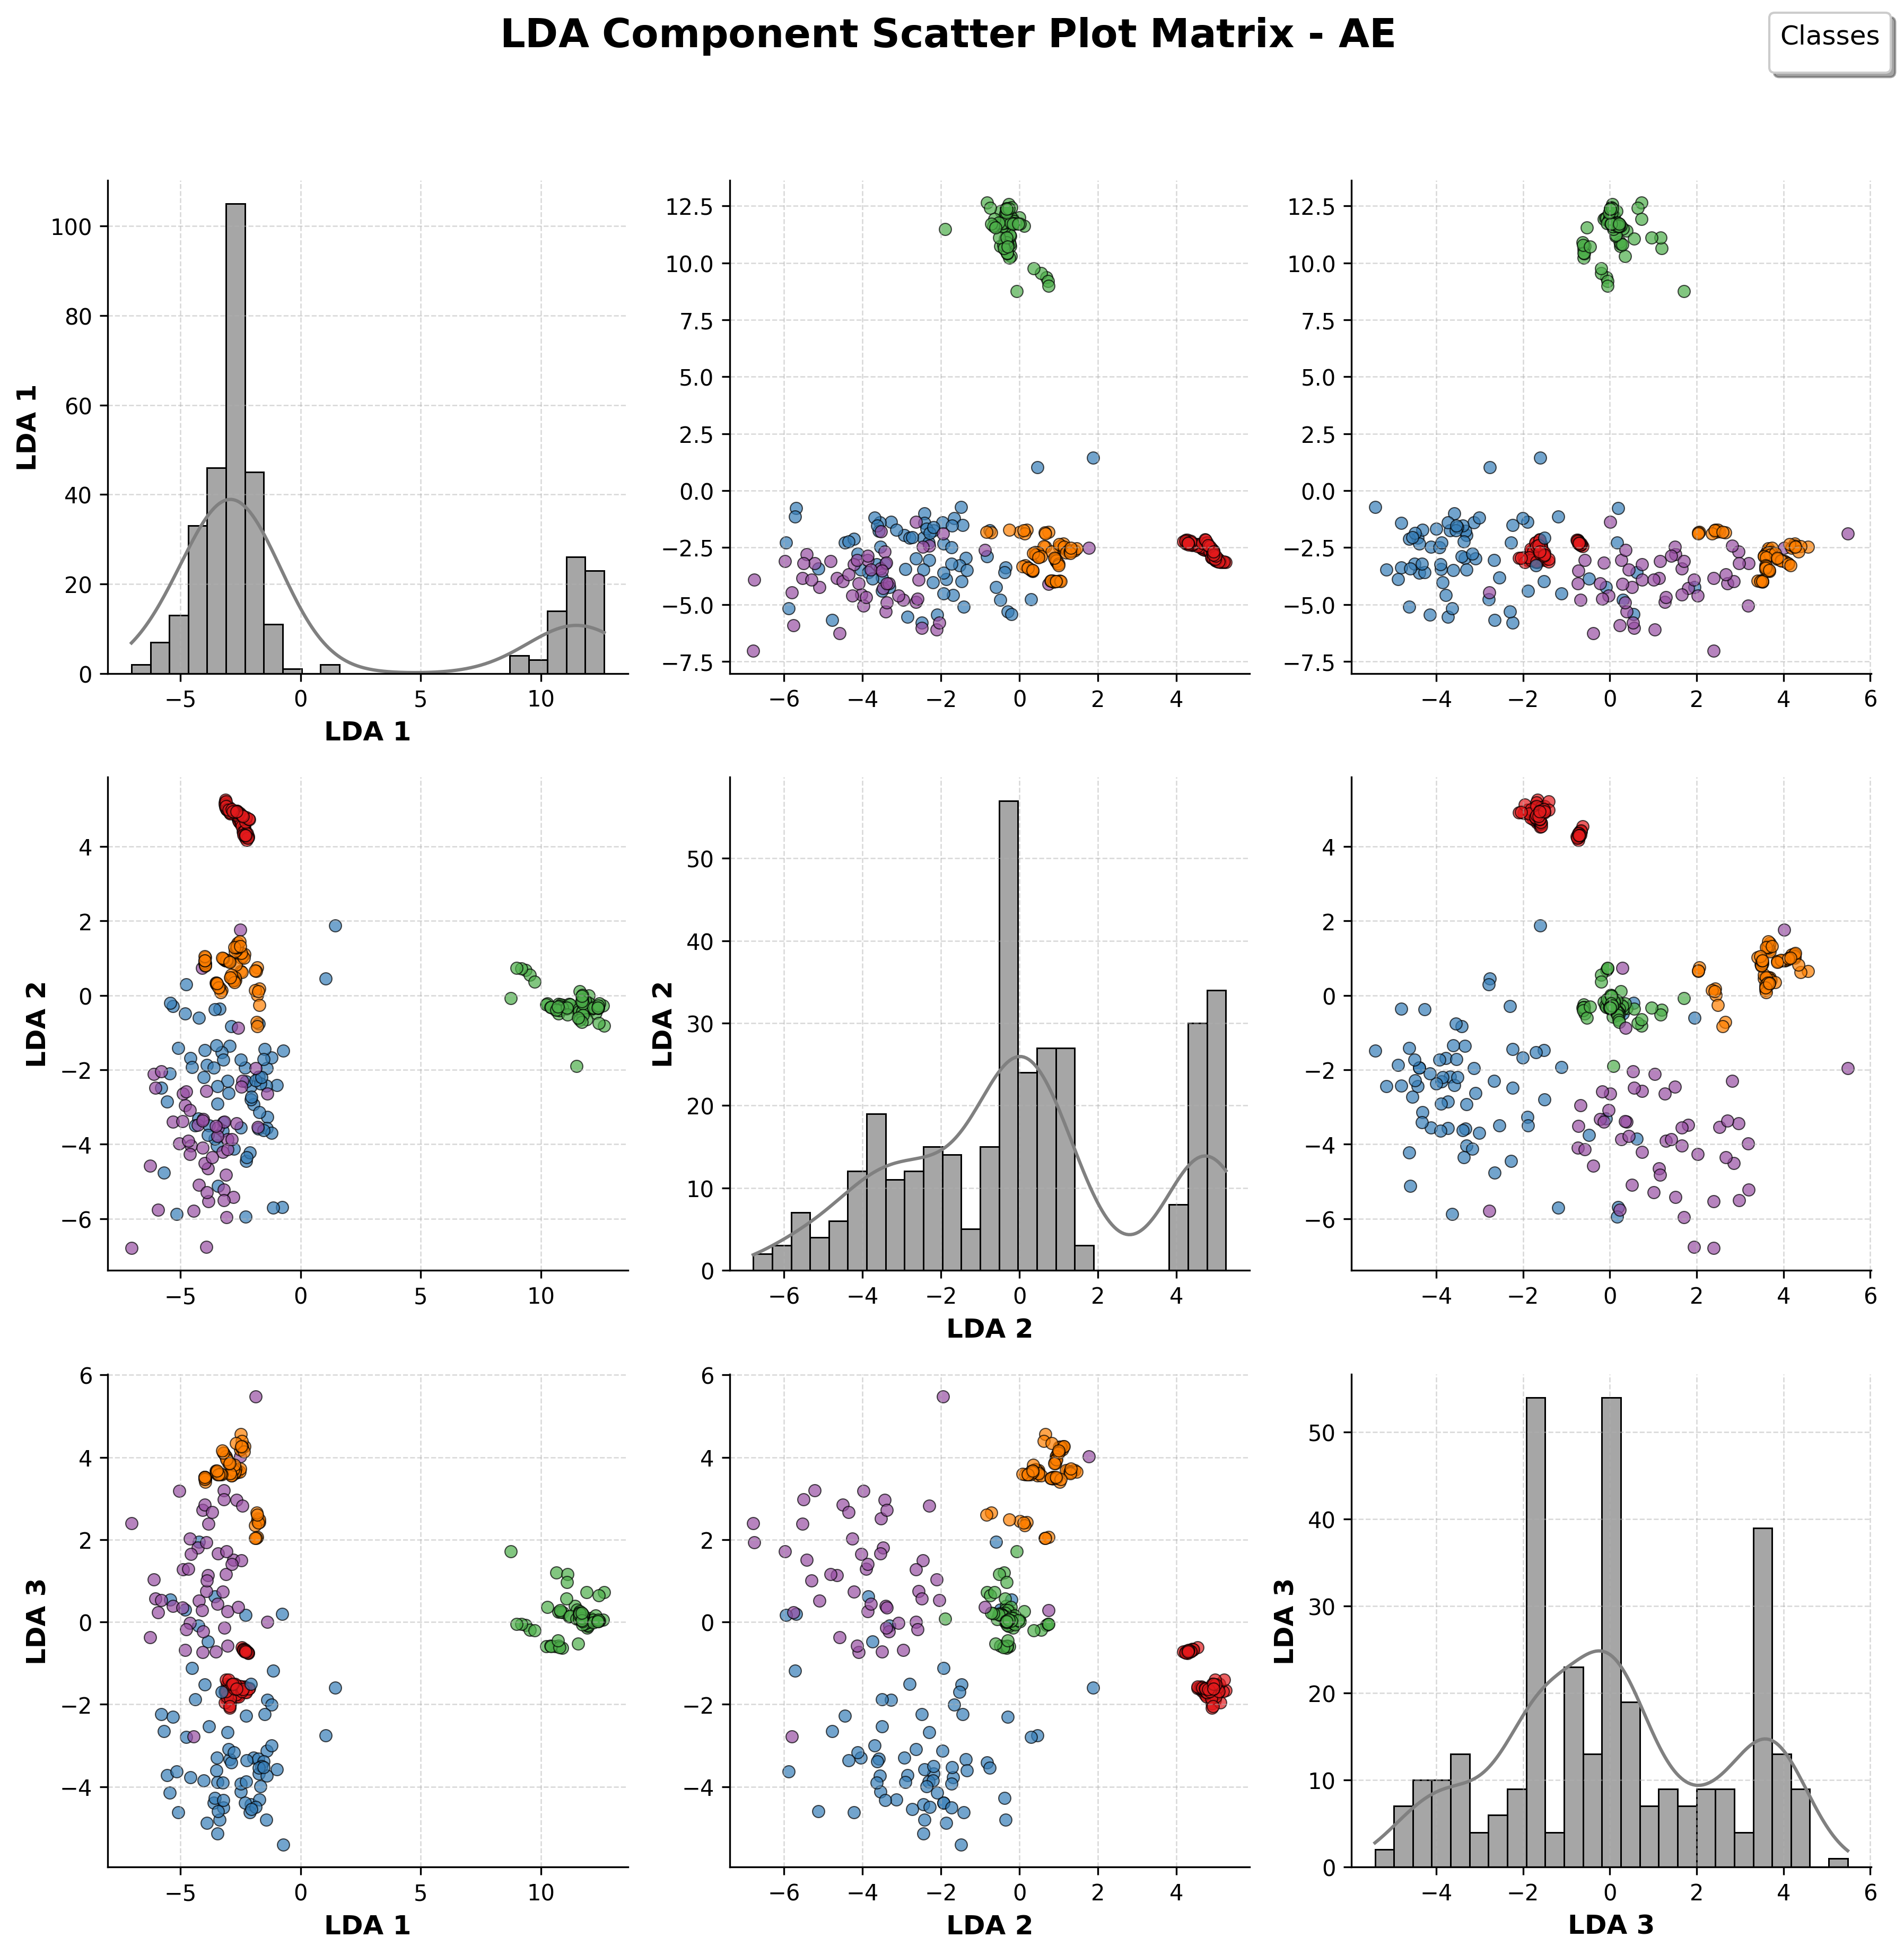

In [31]:
plot_lda_components(lda_ae, labels, "AE")

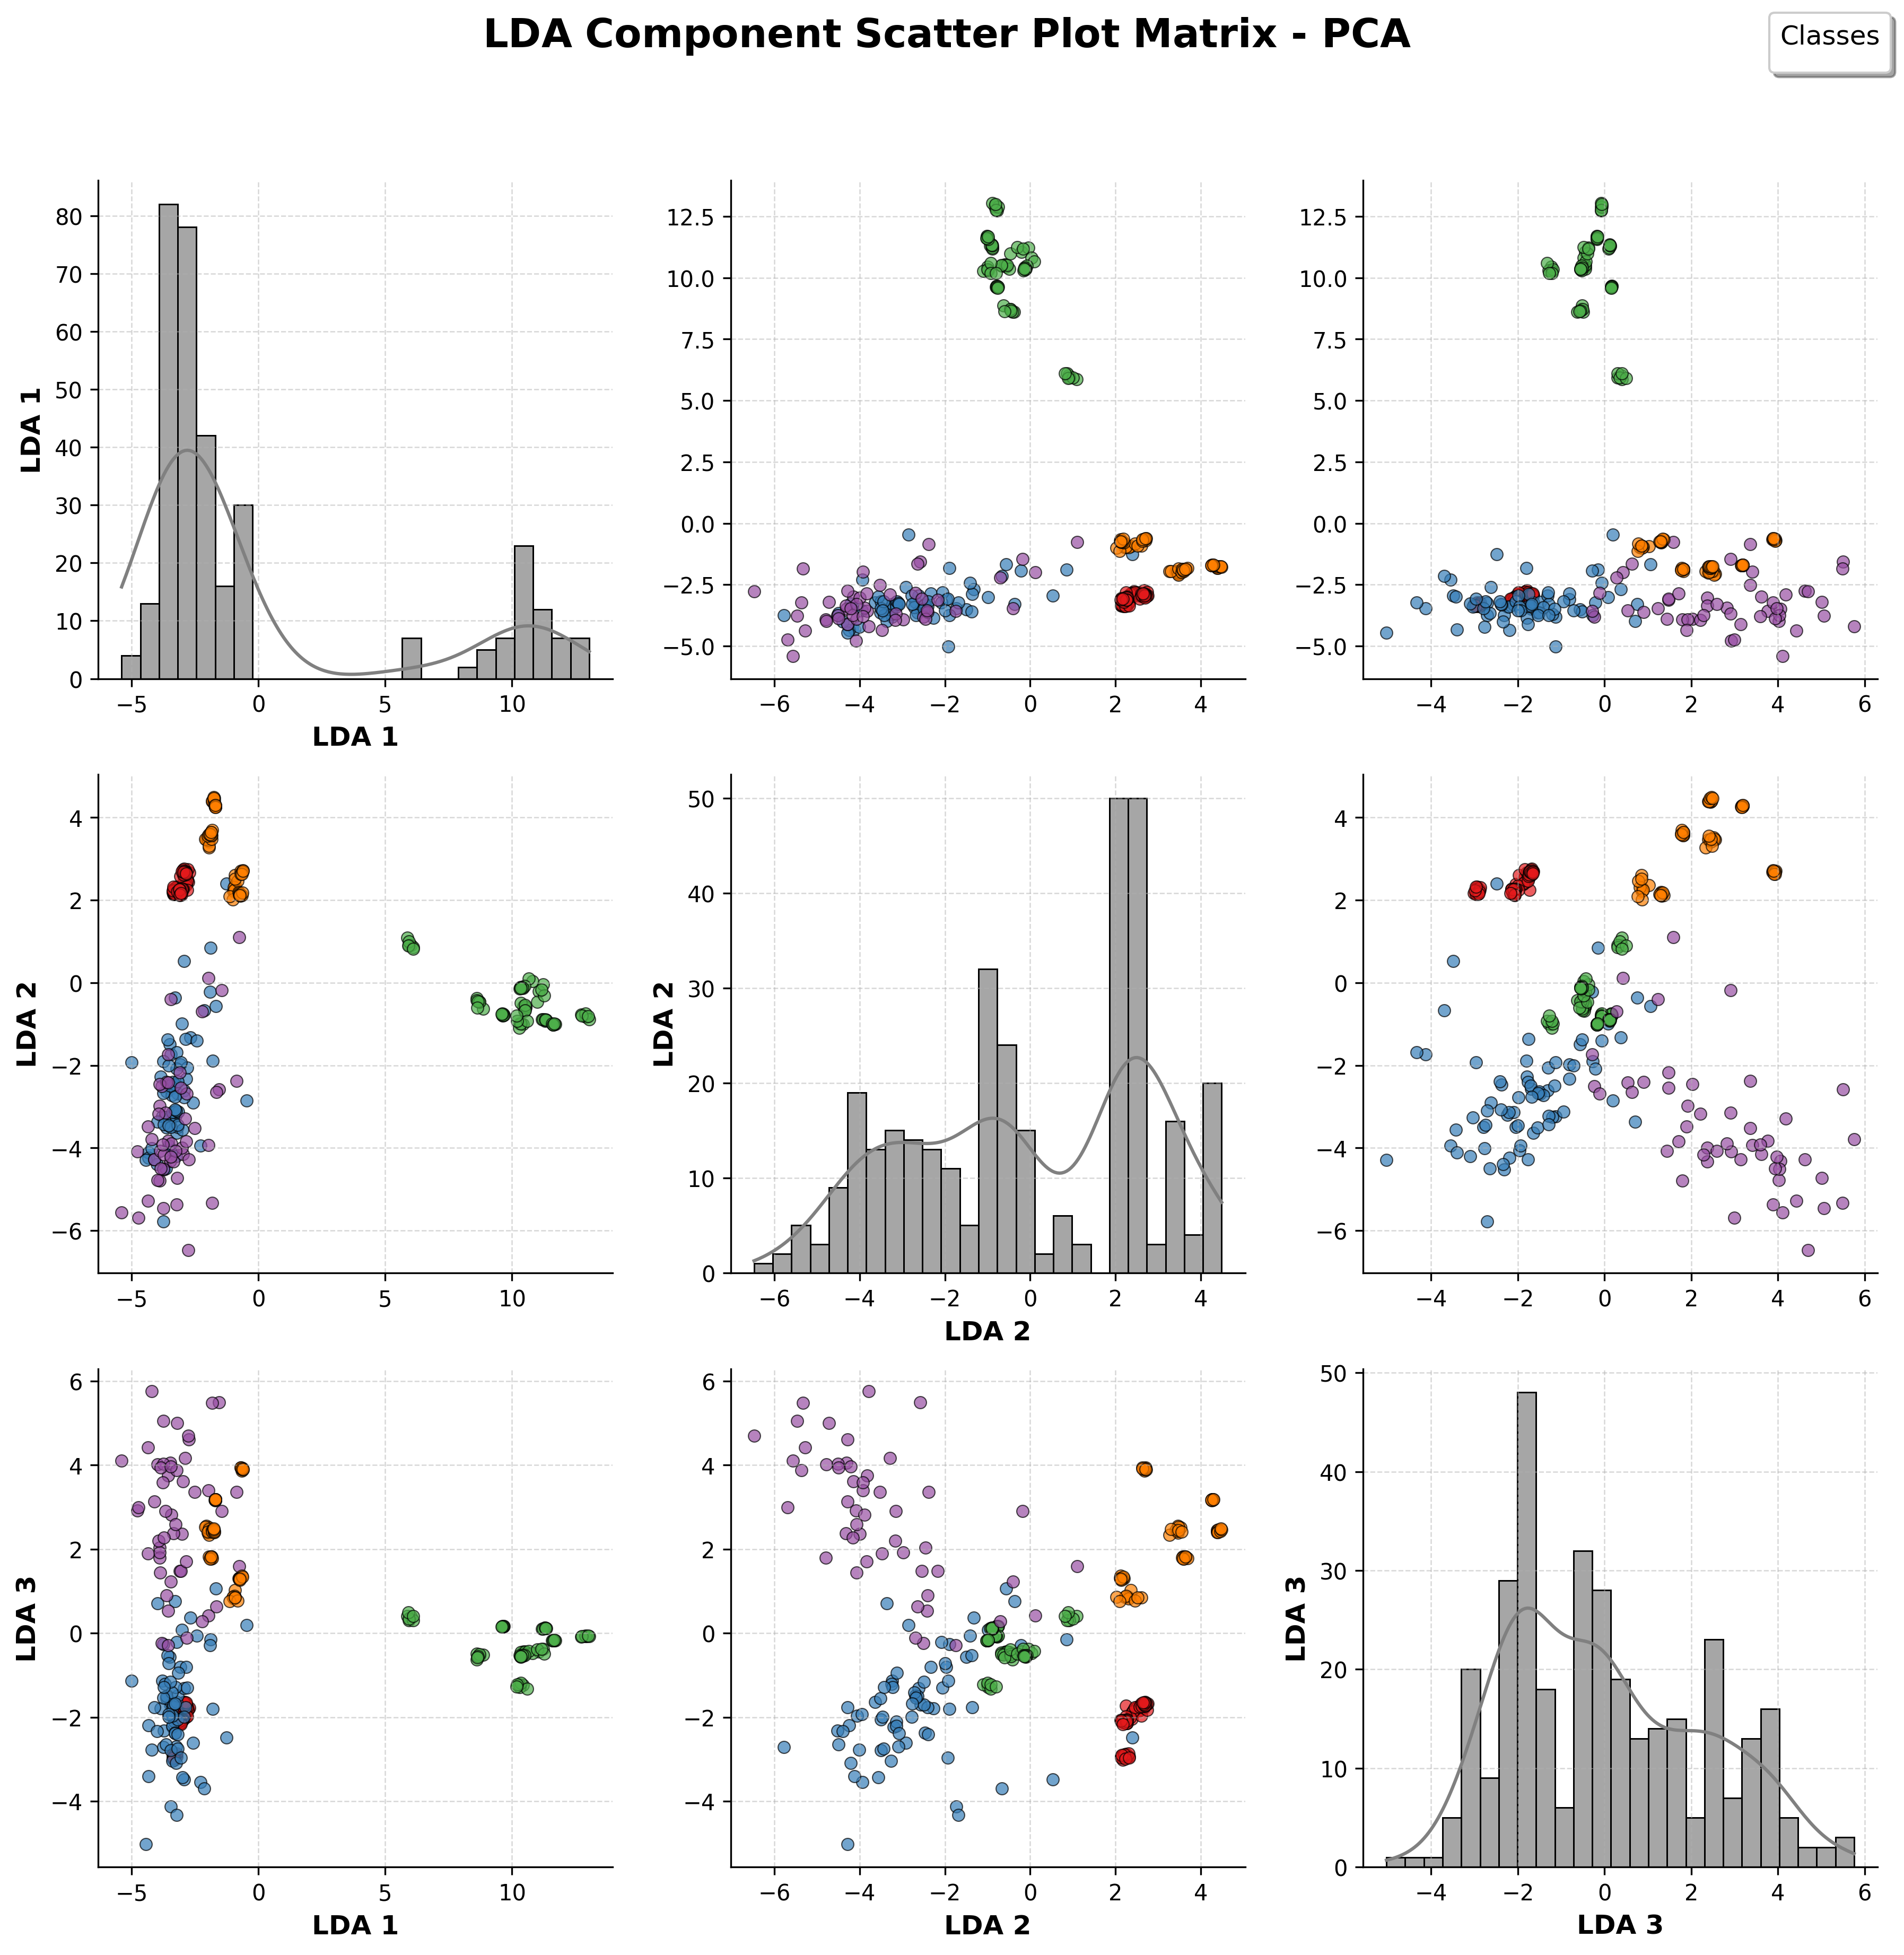

In [32]:
plot_lda_components(lda_pca, labels, "PCA")

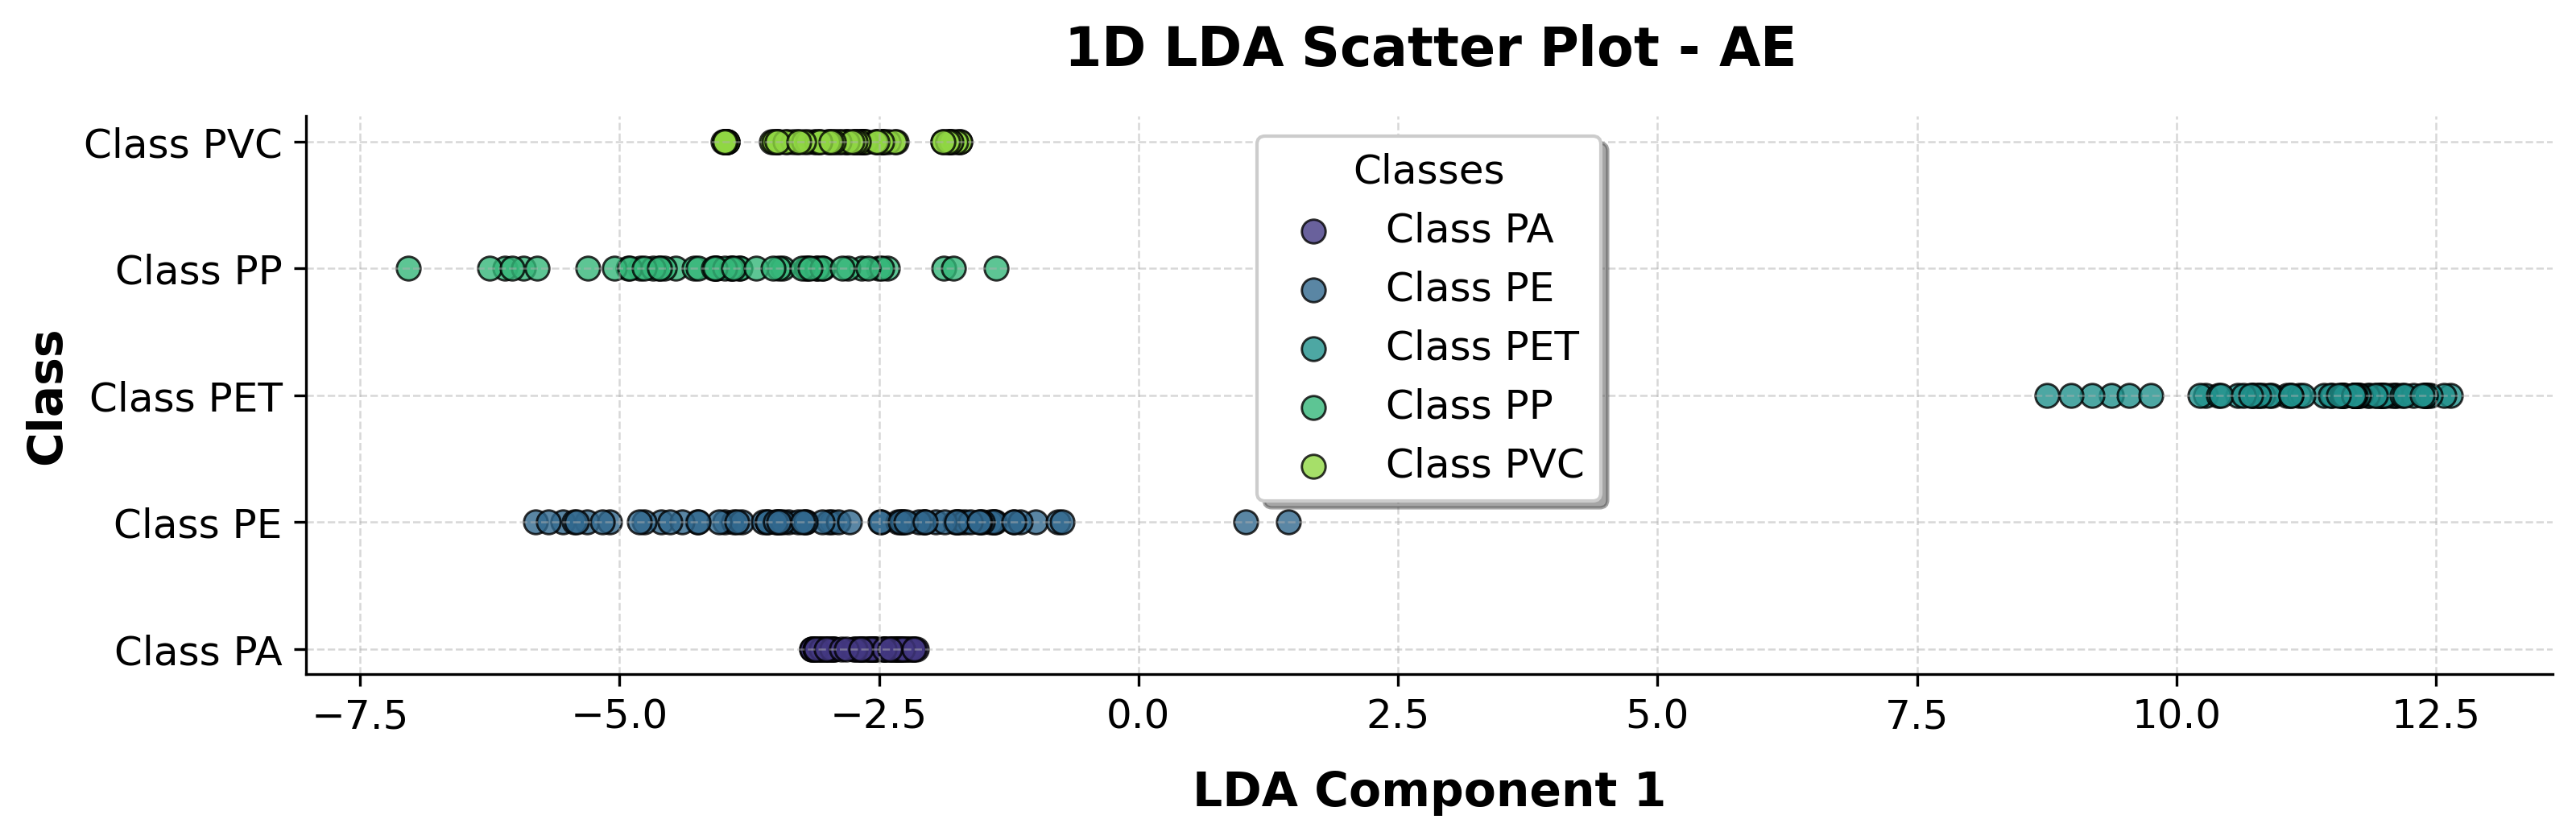

In [33]:
plot_lda_1d(lda_ae, labels, "AE")

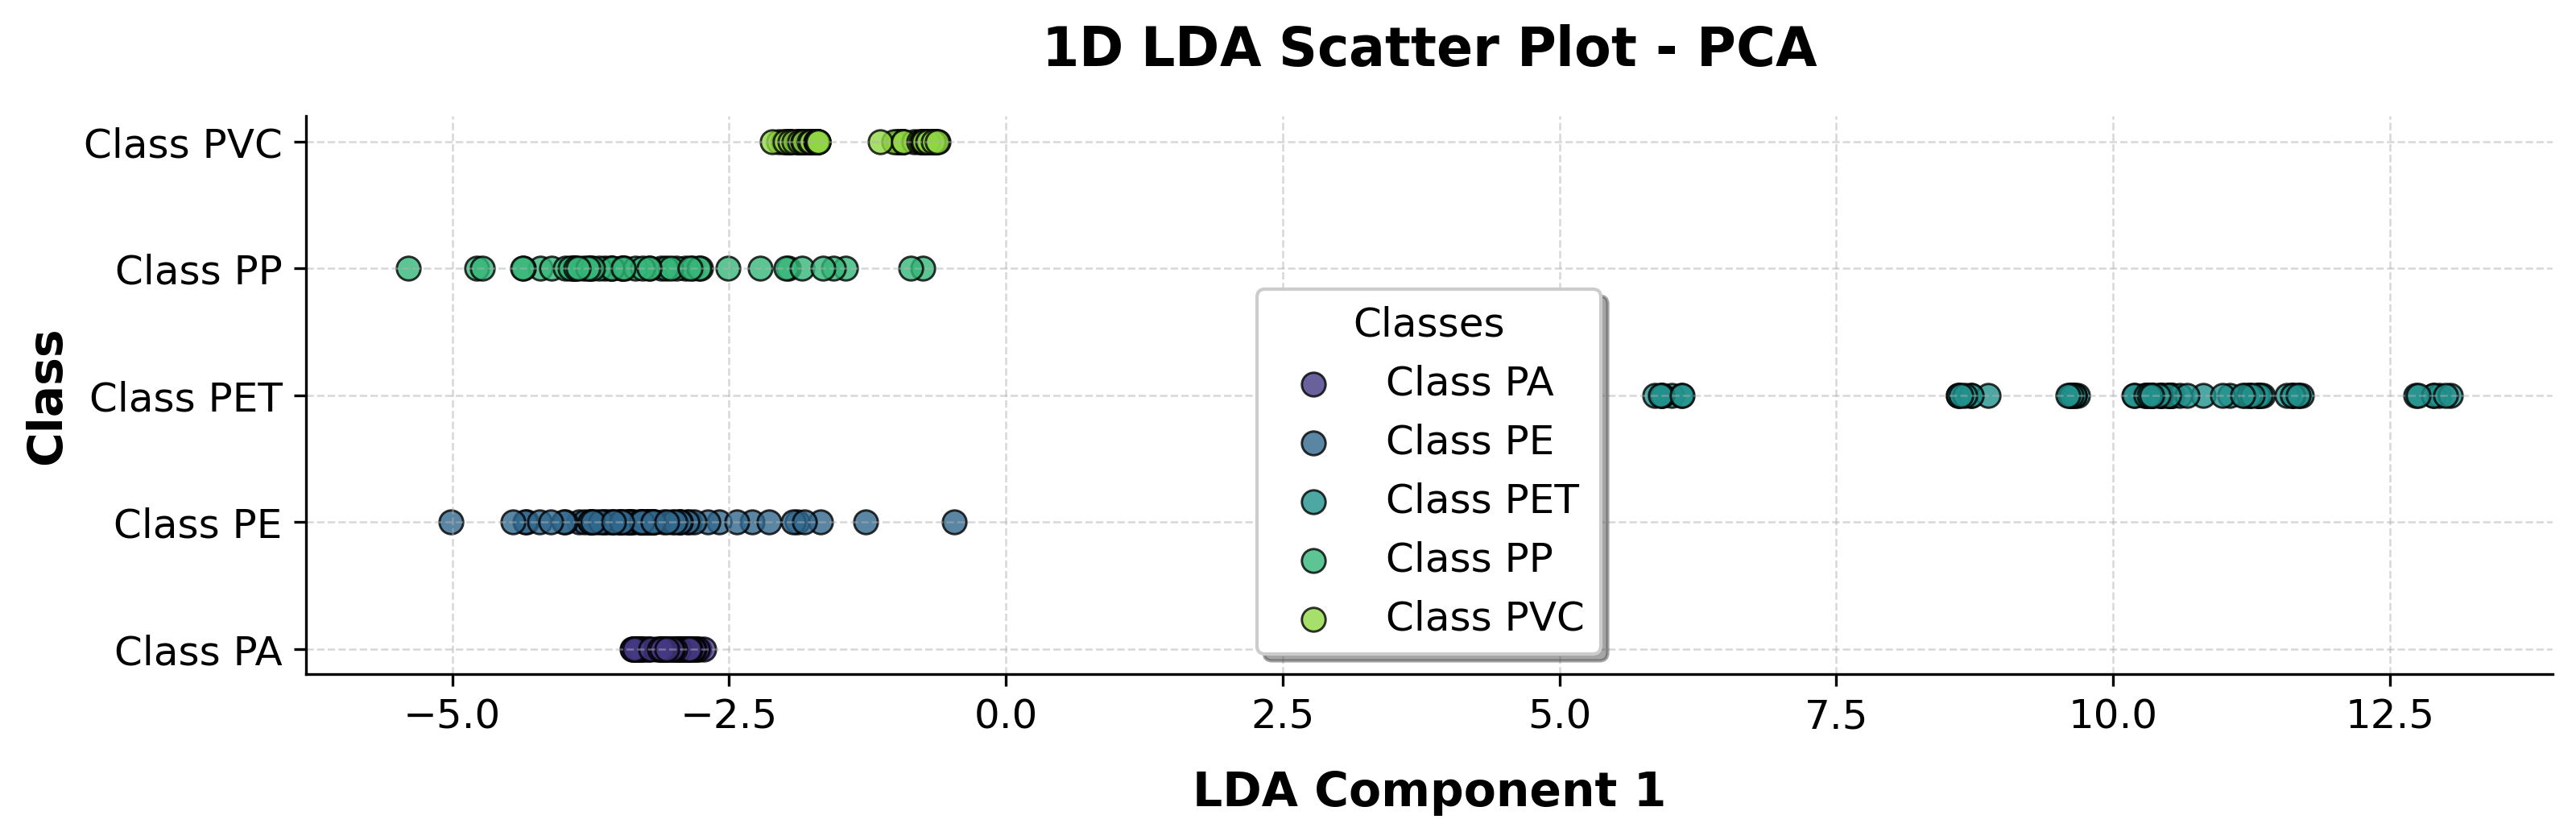

In [34]:
plot_lda_1d(lda_pca, labels, "PCA")

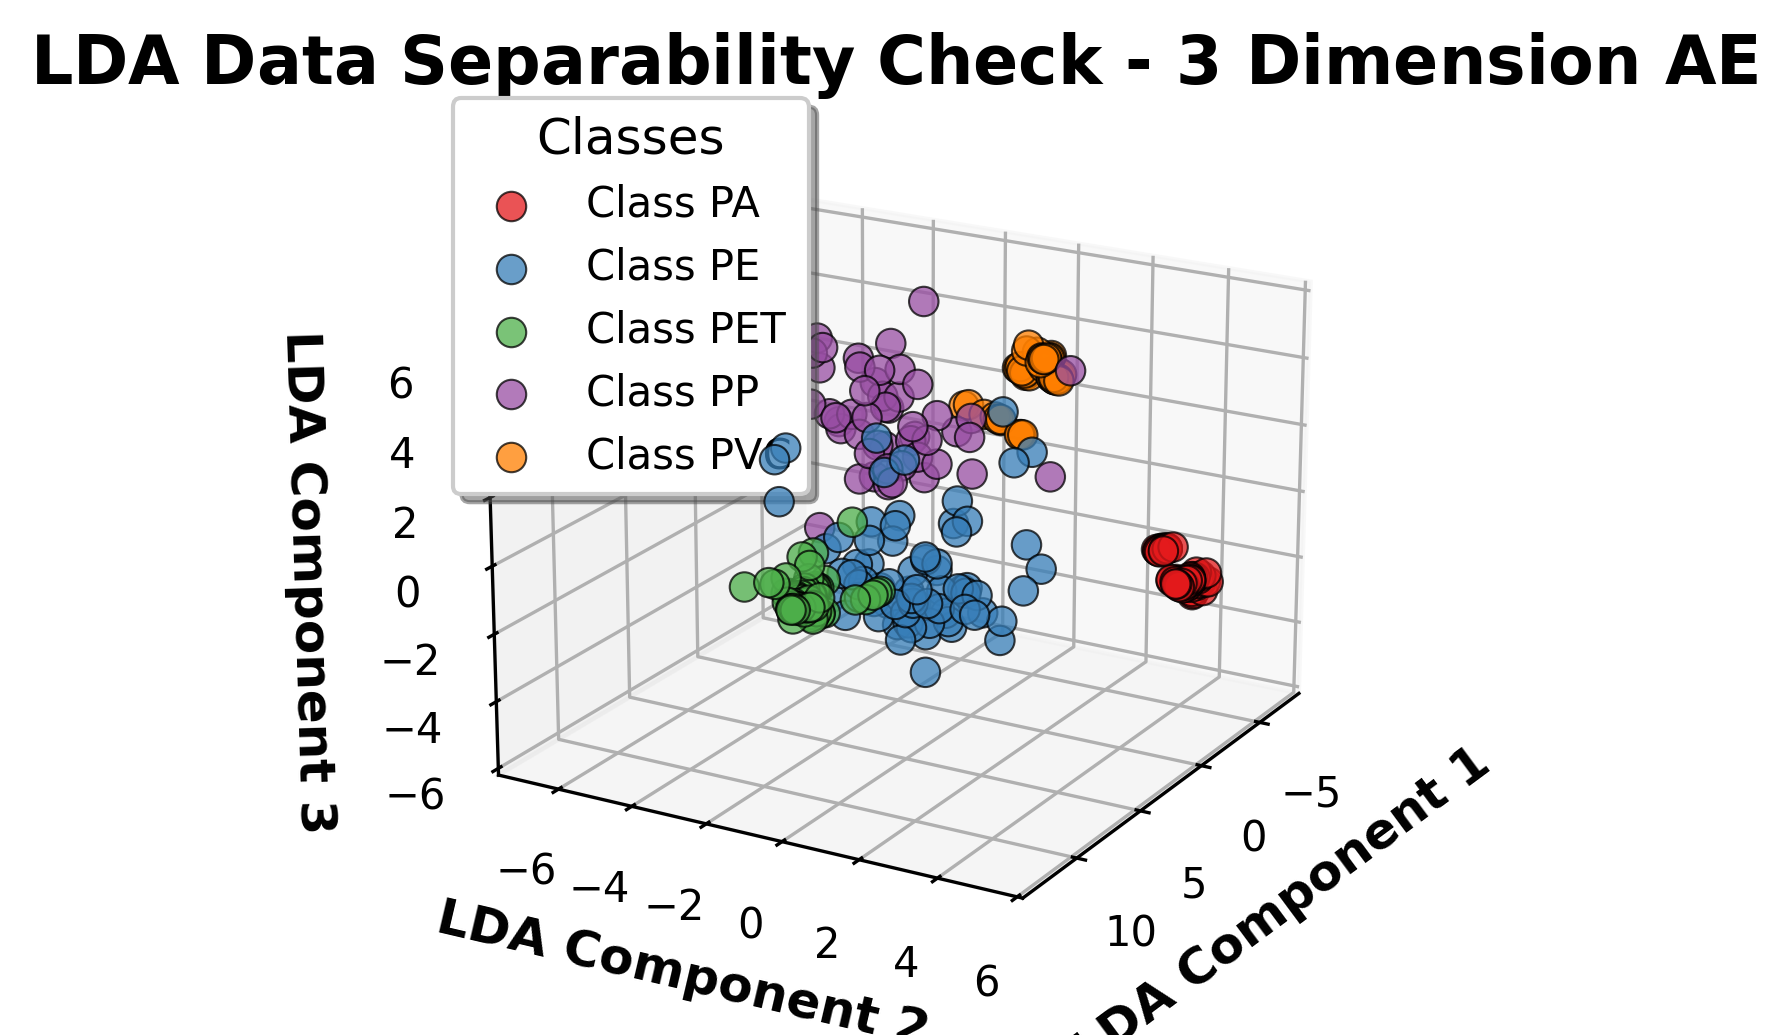

In [35]:
plot_lda(lda_ae, labels, "AE", n_components=3)

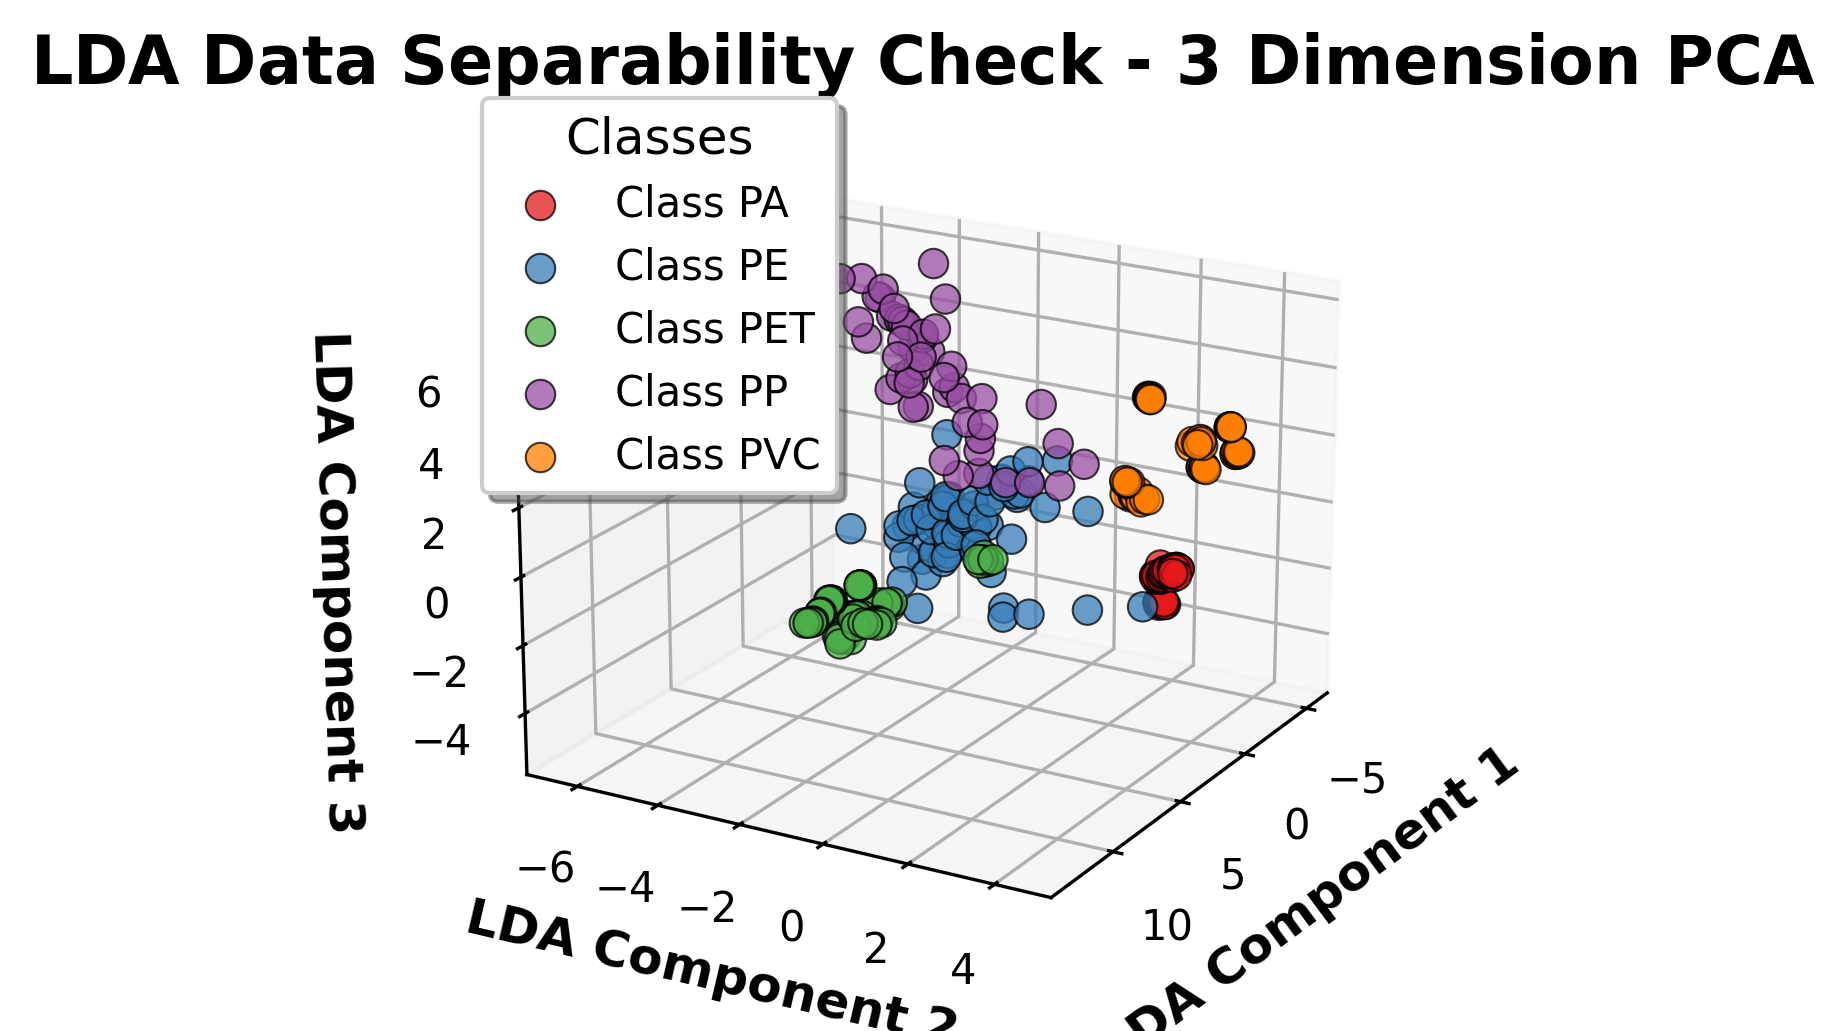

In [36]:
plot_lda(lda_pca, labels, "PCA", n_components=3)

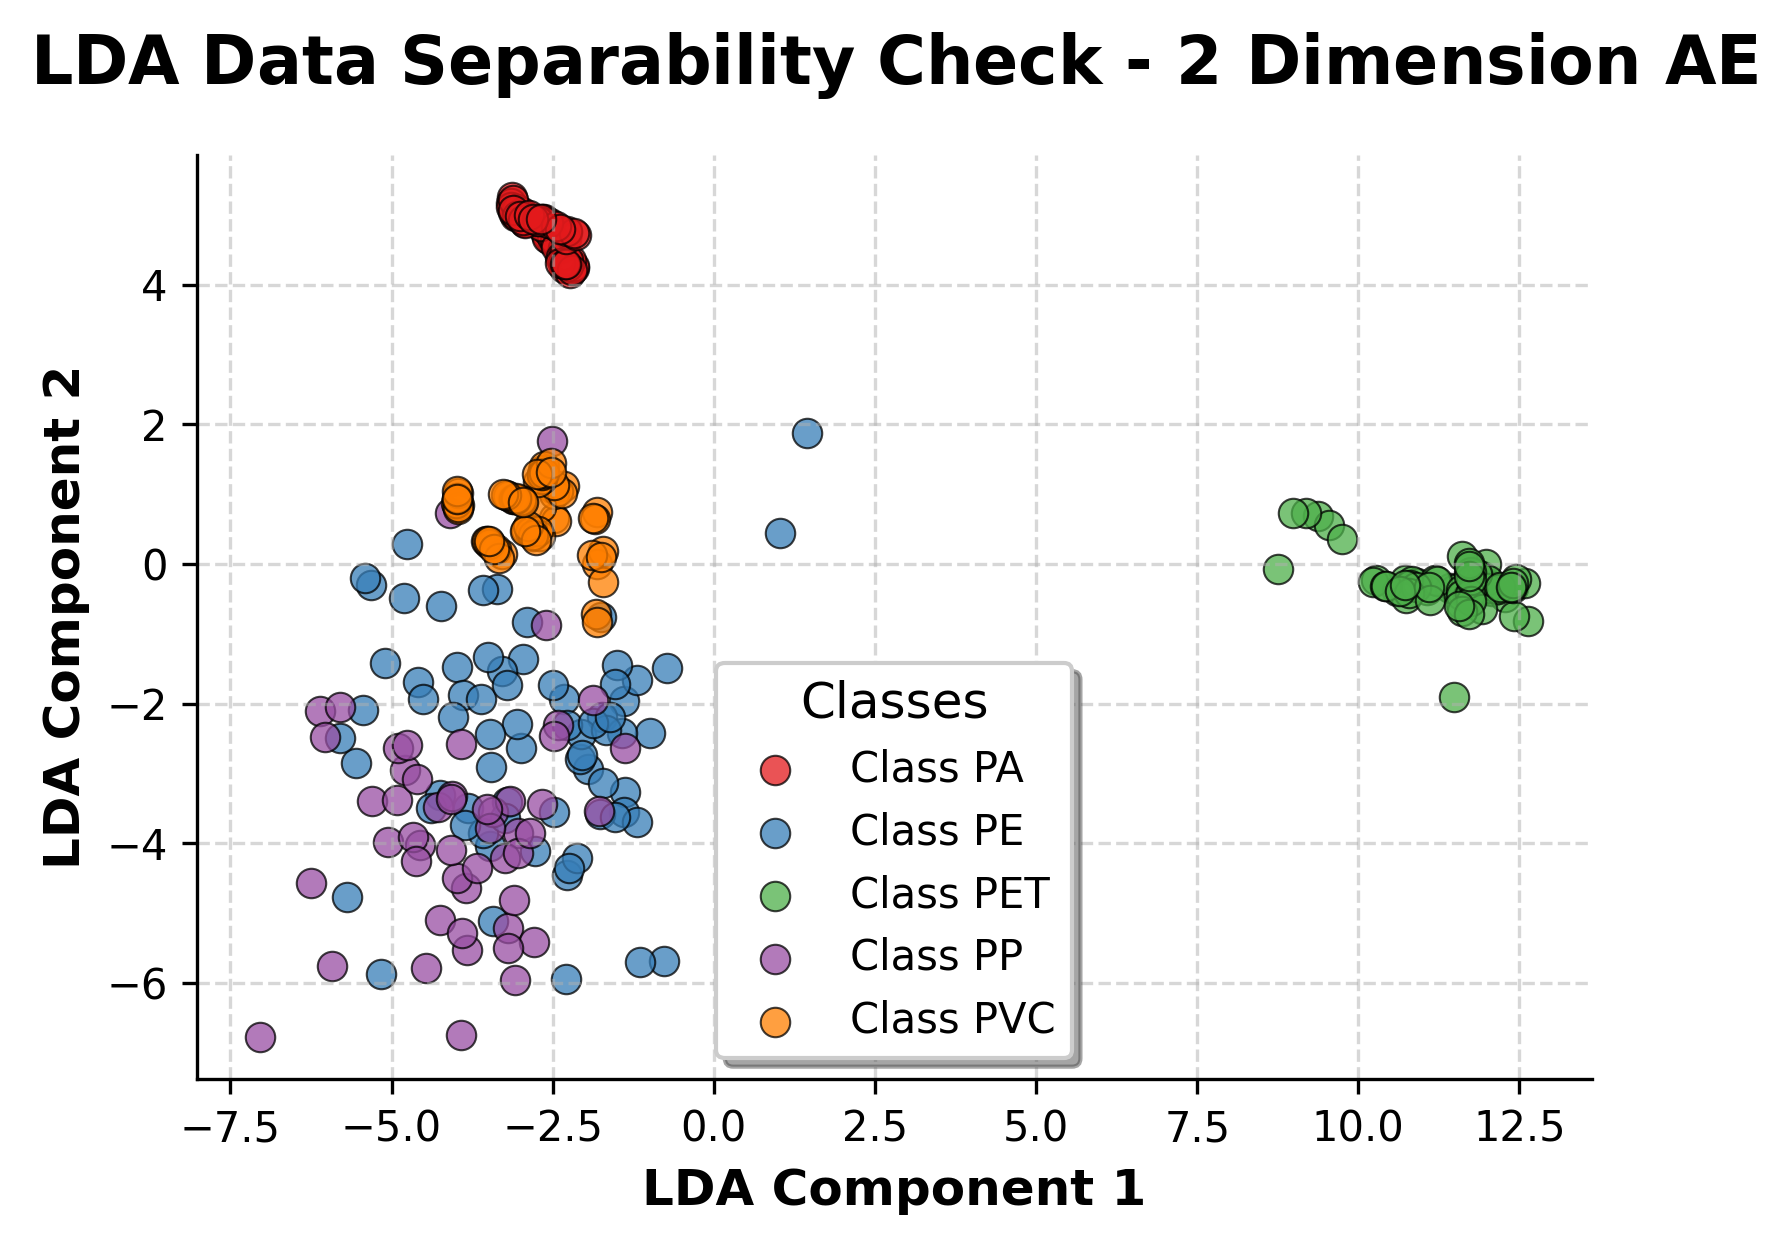

In [37]:
plot_lda(lda_ae, labels, "AE", n_components=2)

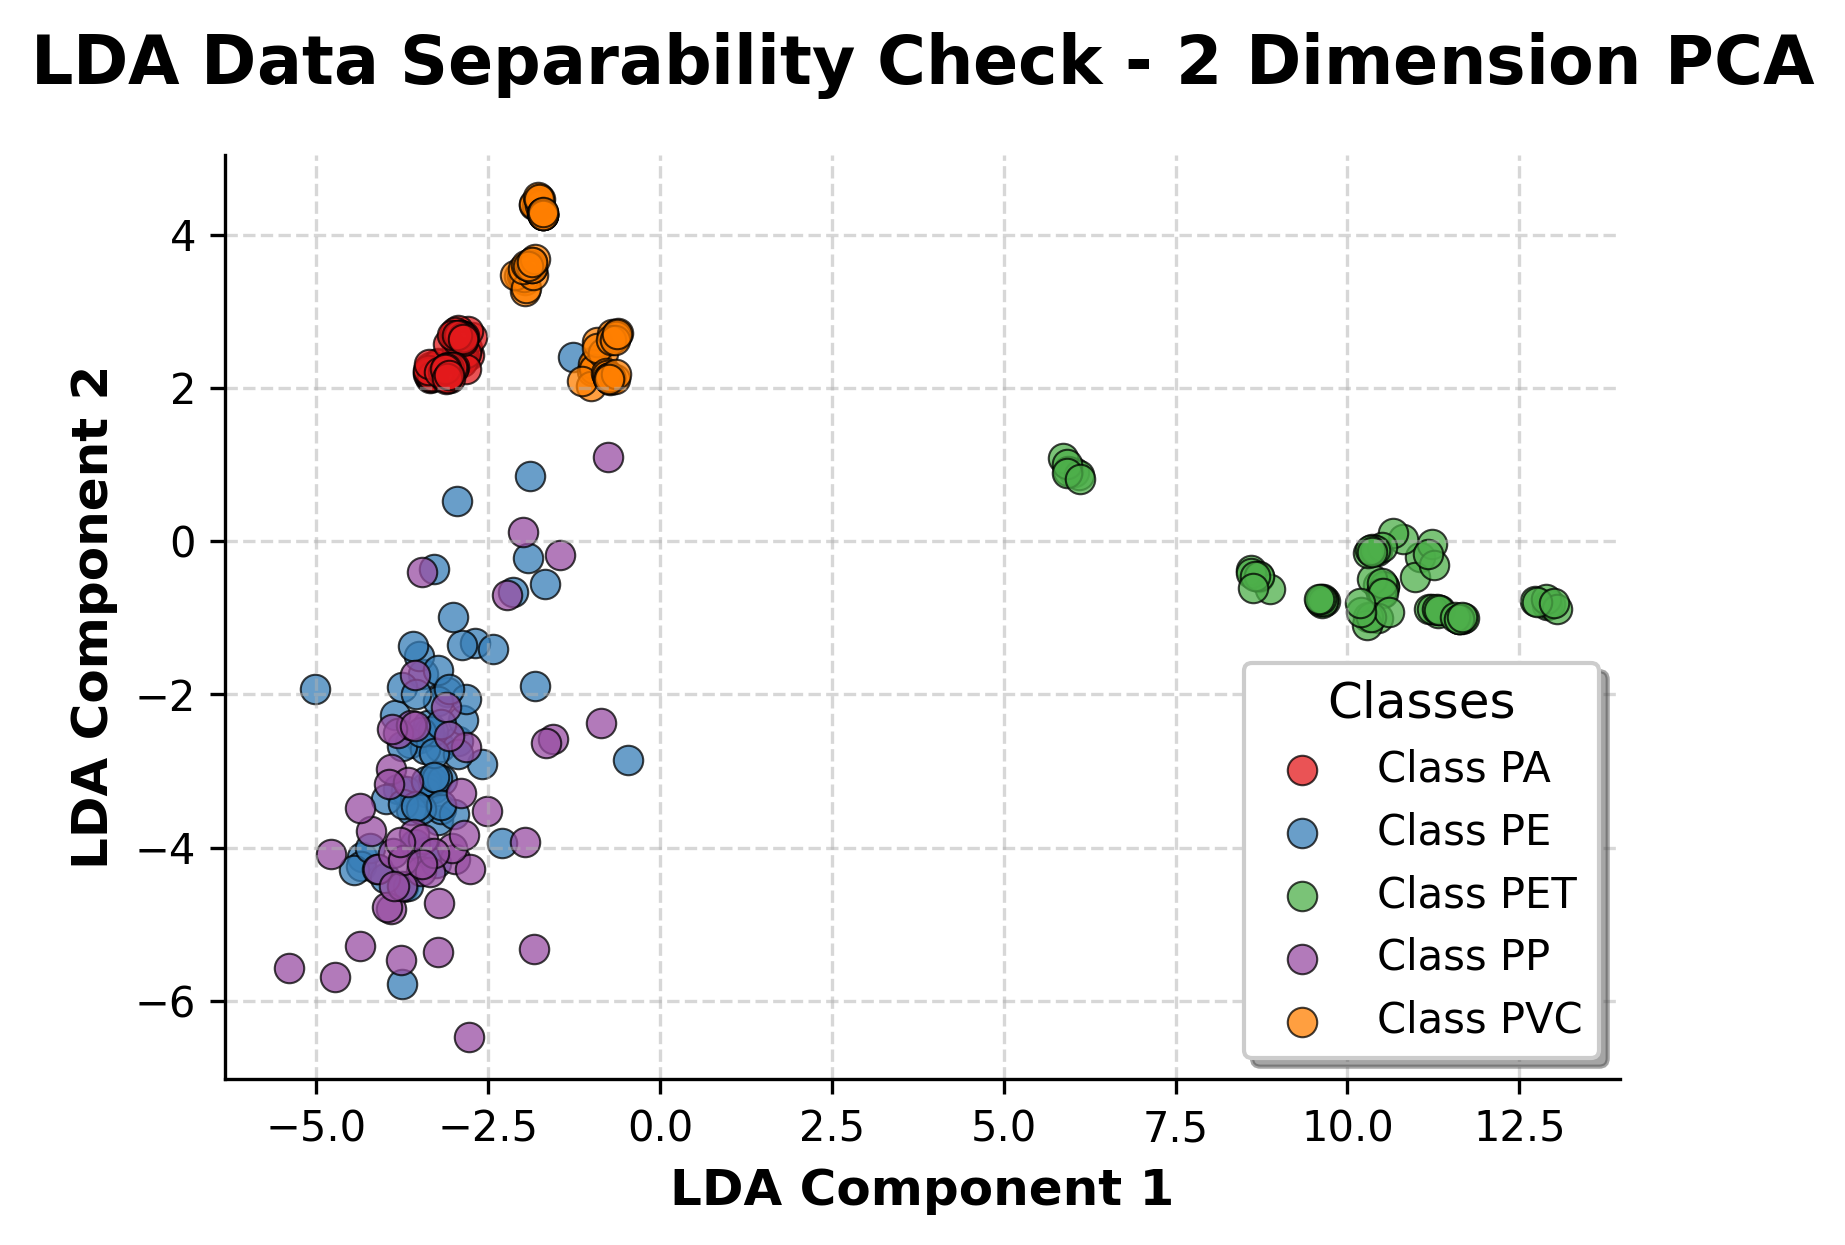

In [38]:
plot_lda(lda_pca, labels, "PCA", n_components=2)

# 4. VQC

In [39]:
vqc_data = np.concatenate((lda_ae, lda_pca), axis=1)
print("Concatenated vertically:\n", vqc_data.shape)

Concatenated vertically:
 (335, 6)


In [ ]:
# !pip install pennylane


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import torch
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
vqc_data = scaler.fit_transform(vqc_data)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vqc_data, y, test_size=0.2, random_state=42,stratify=y)

X_train, y_train = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long)
X_test, y_test = torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long)

In [42]:
import pennylane as qml
import numpy as np
import torch
from torch import nn
from torch.optim import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Hyperparameters
num_qubits = 6       # 6 qubits
num_layers = 2       # Reduced depth for speed
num_classes = 5      # 5-class classification
epochs = 500         # Fewer epochs for faster training
batch_size = 16      # Mini-batch size
learning_rate = 0.01 # Learning rate

# Define Quantum Device (6 qubits)
dev = qml.device("default.qubit", wires=num_qubits)

# Quantum Circuit with Amplitude Embedding
@qml.qnode(dev, interface="torch")
def quantum_circuit(inputs, weights):
    # Ensure input is properly normalized for amplitude embedding
    norm = torch.norm(inputs)
    if norm > 0:
        inputs = inputs / norm  # Normalize input vector

    # Amplitude Embedding (requires input of size 2^num_qubits)
    qml.AmplitudeEmbedding(features=inputs, wires=range(num_qubits), normalize=False)

    # Variational Quantum Circuit (VQC)
    for w in weights:
        for i in range(num_qubits):
            qml.RY(w[i], wires=i)
            qml.RZ(w[i], wires=i)  # Removed RX for speed

        # Star Entanglement: Faster than All-to-All
        for i in range(1, num_qubits):
            qml.CNOT(wires=[0, i])  # Connect all to qubit 0

    return [qml.expval(qml.PauliZ(i)) for i in range(num_qubits)]  # Expectation values

# Define Torch Model with Quantum Layer
class QuantumClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.q_weights = nn.Parameter(0.01 * torch.randn(num_layers, num_qubits))  # Trainable weights
        self.fc = nn.Linear(num_qubits, num_classes)  # Fully connected layer

    def forward(self, x):
        # Ensure input size matches 2^num_qubits (padding if necessary)
        target_dim = 2**num_qubits
        batch_size = x.shape[0]
        
        # Pad or truncate input to match the required dimension
        if x.shape[1] < target_dim:
            padding = torch.zeros((batch_size, target_dim - x.shape[1]))
            x = torch.cat((x, padding), dim=1)
        elif x.shape[1] > target_dim:
            x = x[:, :target_dim]  # Truncate if too large

        q_out = torch.tensor([quantum_circuit(xi, self.q_weights) for xi in x], dtype=torch.float32)
        return self.fc(q_out)  # Map quantum features to class probabilities

# Initialize Model, Loss, Optimizer
model = QuantumClassifier()
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=learning_rate)

print("✅ Model Updated with n_layers=2 and n_shots=500")

✅ Model Updated with n_layers=2 and n_shots=500


In [43]:
# Training Loop
loss_values = []
accuracy_values = []
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss.backward()
    optimizer.step()

    correct = (y_pred.argmax(dim=1) == y_train).sum().item()
    accuracy = correct / len(y_train) * 100

    loss_values.append(loss.item())
    accuracy_values.append(accuracy)

    print(f"Epoch {epoch} | Loss: {loss.item():.4f} | Accuracy: {accuracy:.2f}%")



Epoch 0 | Loss: 1.7250 | Accuracy: 21.27%
Epoch 1 | Loss: 1.7052 | Accuracy: 21.27%
Epoch 2 | Loss: 1.6873 | Accuracy: 21.27%
Epoch 3 | Loss: 1.6713 | Accuracy: 21.27%
Epoch 4 | Loss: 1.6570 | Accuracy: 21.27%
Epoch 5 | Loss: 1.6440 | Accuracy: 21.27%
Epoch 6 | Loss: 1.6321 | Accuracy: 21.27%
Epoch 7 | Loss: 1.6210 | Accuracy: 21.27%
Epoch 8 | Loss: 1.6108 | Accuracy: 21.27%
Epoch 9 | Loss: 1.6012 | Accuracy: 21.27%
Epoch 10 | Loss: 1.5924 | Accuracy: 21.27%
Epoch 11 | Loss: 1.5843 | Accuracy: 28.36%
Epoch 12 | Loss: 1.5768 | Accuracy: 42.16%
Epoch 13 | Loss: 1.5699 | Accuracy: 42.16%
Epoch 14 | Loss: 1.5635 | Accuracy: 42.16%
Epoch 15 | Loss: 1.5575 | Accuracy: 42.16%
Epoch 16 | Loss: 1.5518 | Accuracy: 42.91%
Epoch 17 | Loss: 1.5463 | Accuracy: 43.28%
Epoch 18 | Loss: 1.5409 | Accuracy: 39.55%
Epoch 19 | Loss: 1.5357 | Accuracy: 28.73%
Epoch 20 | Loss: 1.5306 | Accuracy: 33.58%
Epoch 21 | Loss: 1.5256 | Accuracy: 35.07%
Epoch 22 | Loss: 1.5206 | Accuracy: 36.19%
Epoch 23 | Loss: 1.51

In [44]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
import pennylane as qml

In [45]:
from sklearn.metrics import classification_report

# Evaluate on Test Dataset
model.eval()  # Set the model to evaluation mode

# Make predictions on the test dataset
with torch.no_grad():  # No need to compute gradients for evaluation
    y_pred_test = model(X_test)  # Get predictions for the test data
    predicted_labels_test = y_pred_test.argmax(dim=1)  # Get the predicted class labels

    # Calculate test accuracy
    test_accuracy = (predicted_labels_test == y_test).float().mean().item() * 100

# Print test accuracy in a structured format
print("\n" + "="*70)
print(f"🚀 Final Test Accuracy: {test_accuracy:.2f}%")
print("="*70 + "\n")

# --- CLASSIFICATION REPORT ---
# Convert numerical labels to class names
class_labels = encoder.classes_  # Use actual class names

# Generate classification report
report = classification_report(y_test.numpy(), predicted_labels_test.numpy(),
                               target_names=class_labels, digits=4)

# Print classification report with formatting
print("📌 Classification Report on Test Dataset:")
print("-" * 70)
print(report)
print("-" * 70)



🚀 Final Test Accuracy: 82.09%

📌 Classification Report on Test Dataset:
----------------------------------------------------------------------
              precision    recall  f1-score   support

          PA     0.7143    1.0000    0.8333        15
          PE     1.0000    0.2857    0.4444        14
         PET     0.8750    1.0000    0.9333        14
          PP     0.8889    0.8000    0.8421        10
         PVC     0.8235    1.0000    0.9032        14

    accuracy                         0.8209        67
   macro avg     0.8603    0.8171    0.7913        67
weighted avg     0.8565    0.8209    0.7889        67

----------------------------------------------------------------------


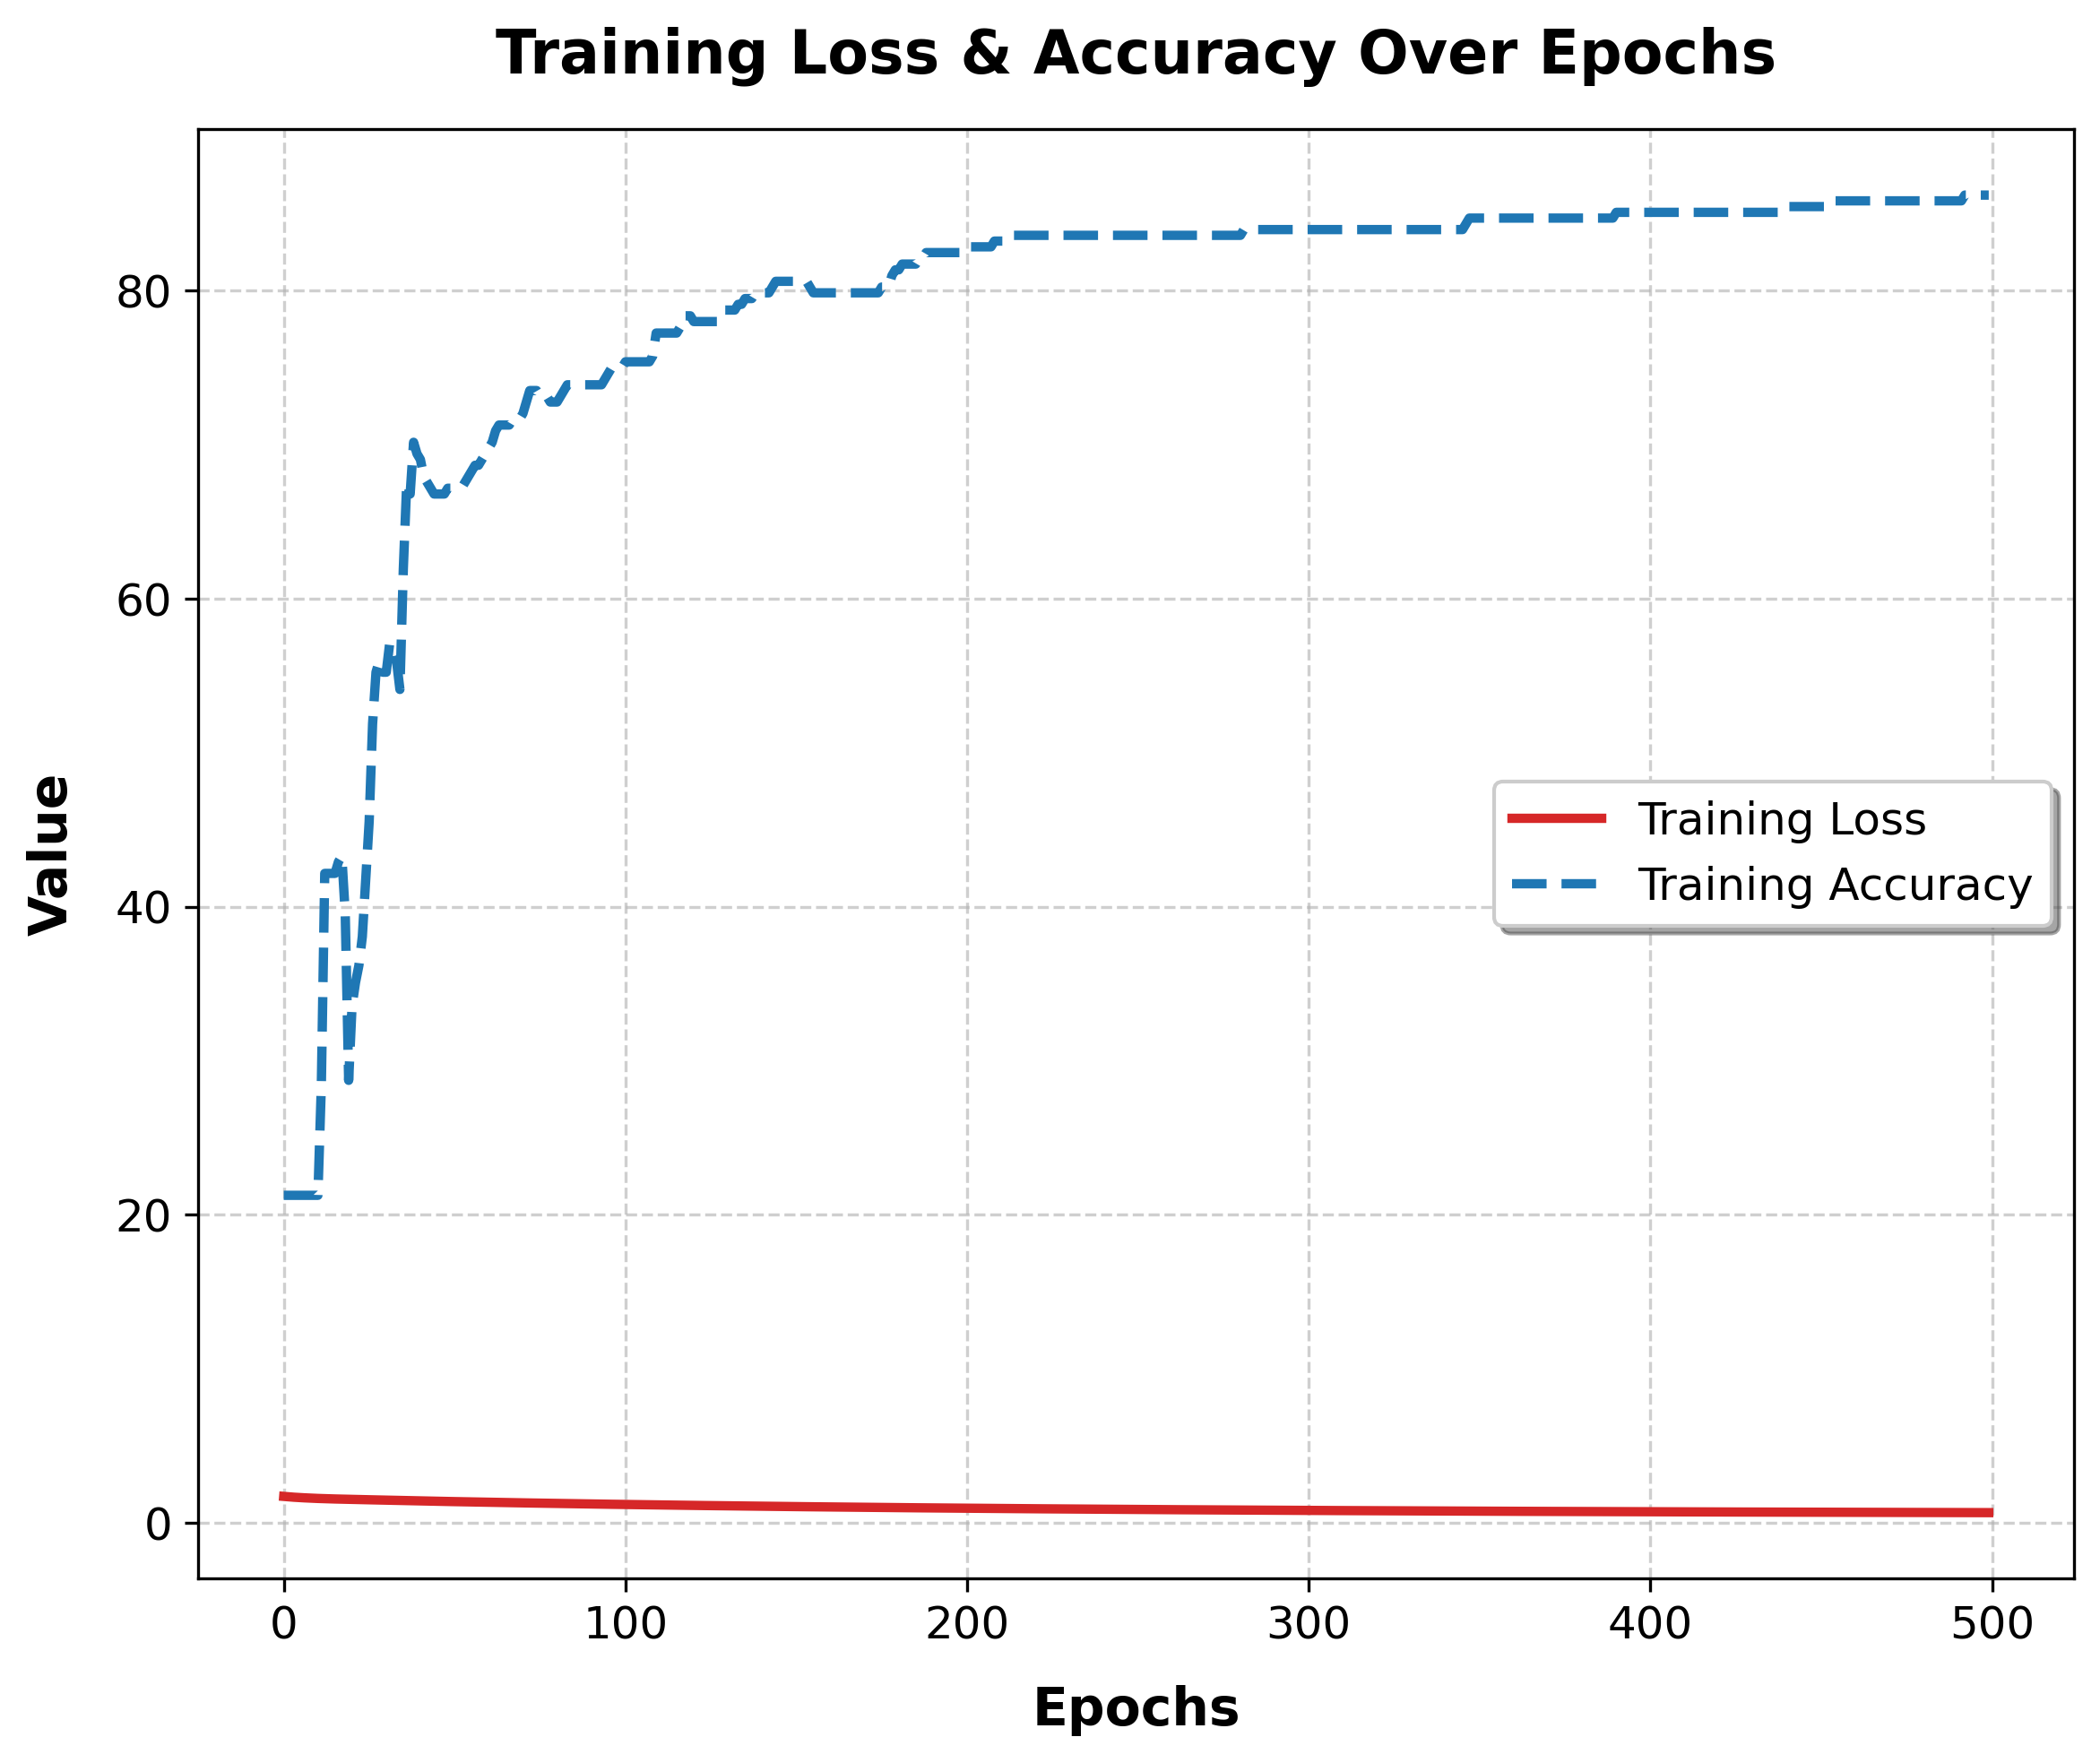

In [46]:
# Create high-resolution figure
plt.figure(figsize=(9, 7), dpi=300)

# Plot Training Loss
plt.plot(loss_values, label="Training Loss", color="#d62728", linewidth=2.5, linestyle="-")

# Plot Training Accuracy
plt.plot(accuracy_values, label="Training Accuracy", color="#1f77b4", linewidth=2.5, linestyle="--")

# Labels & Title
plt.xlabel("Epochs", fontsize=14, fontweight="bold", labelpad=10)
plt.ylabel("Value", fontsize=14, fontweight="bold", labelpad=10)
plt.title("Training Loss & Accuracy Over Epochs", fontsize=16, fontweight="bold", pad=15)

# Customize legend
plt.legend(fontsize=12, loc="best", frameon=True, shadow=True, fancybox=True)

# Add grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

# Set tick parameters for clarity
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()


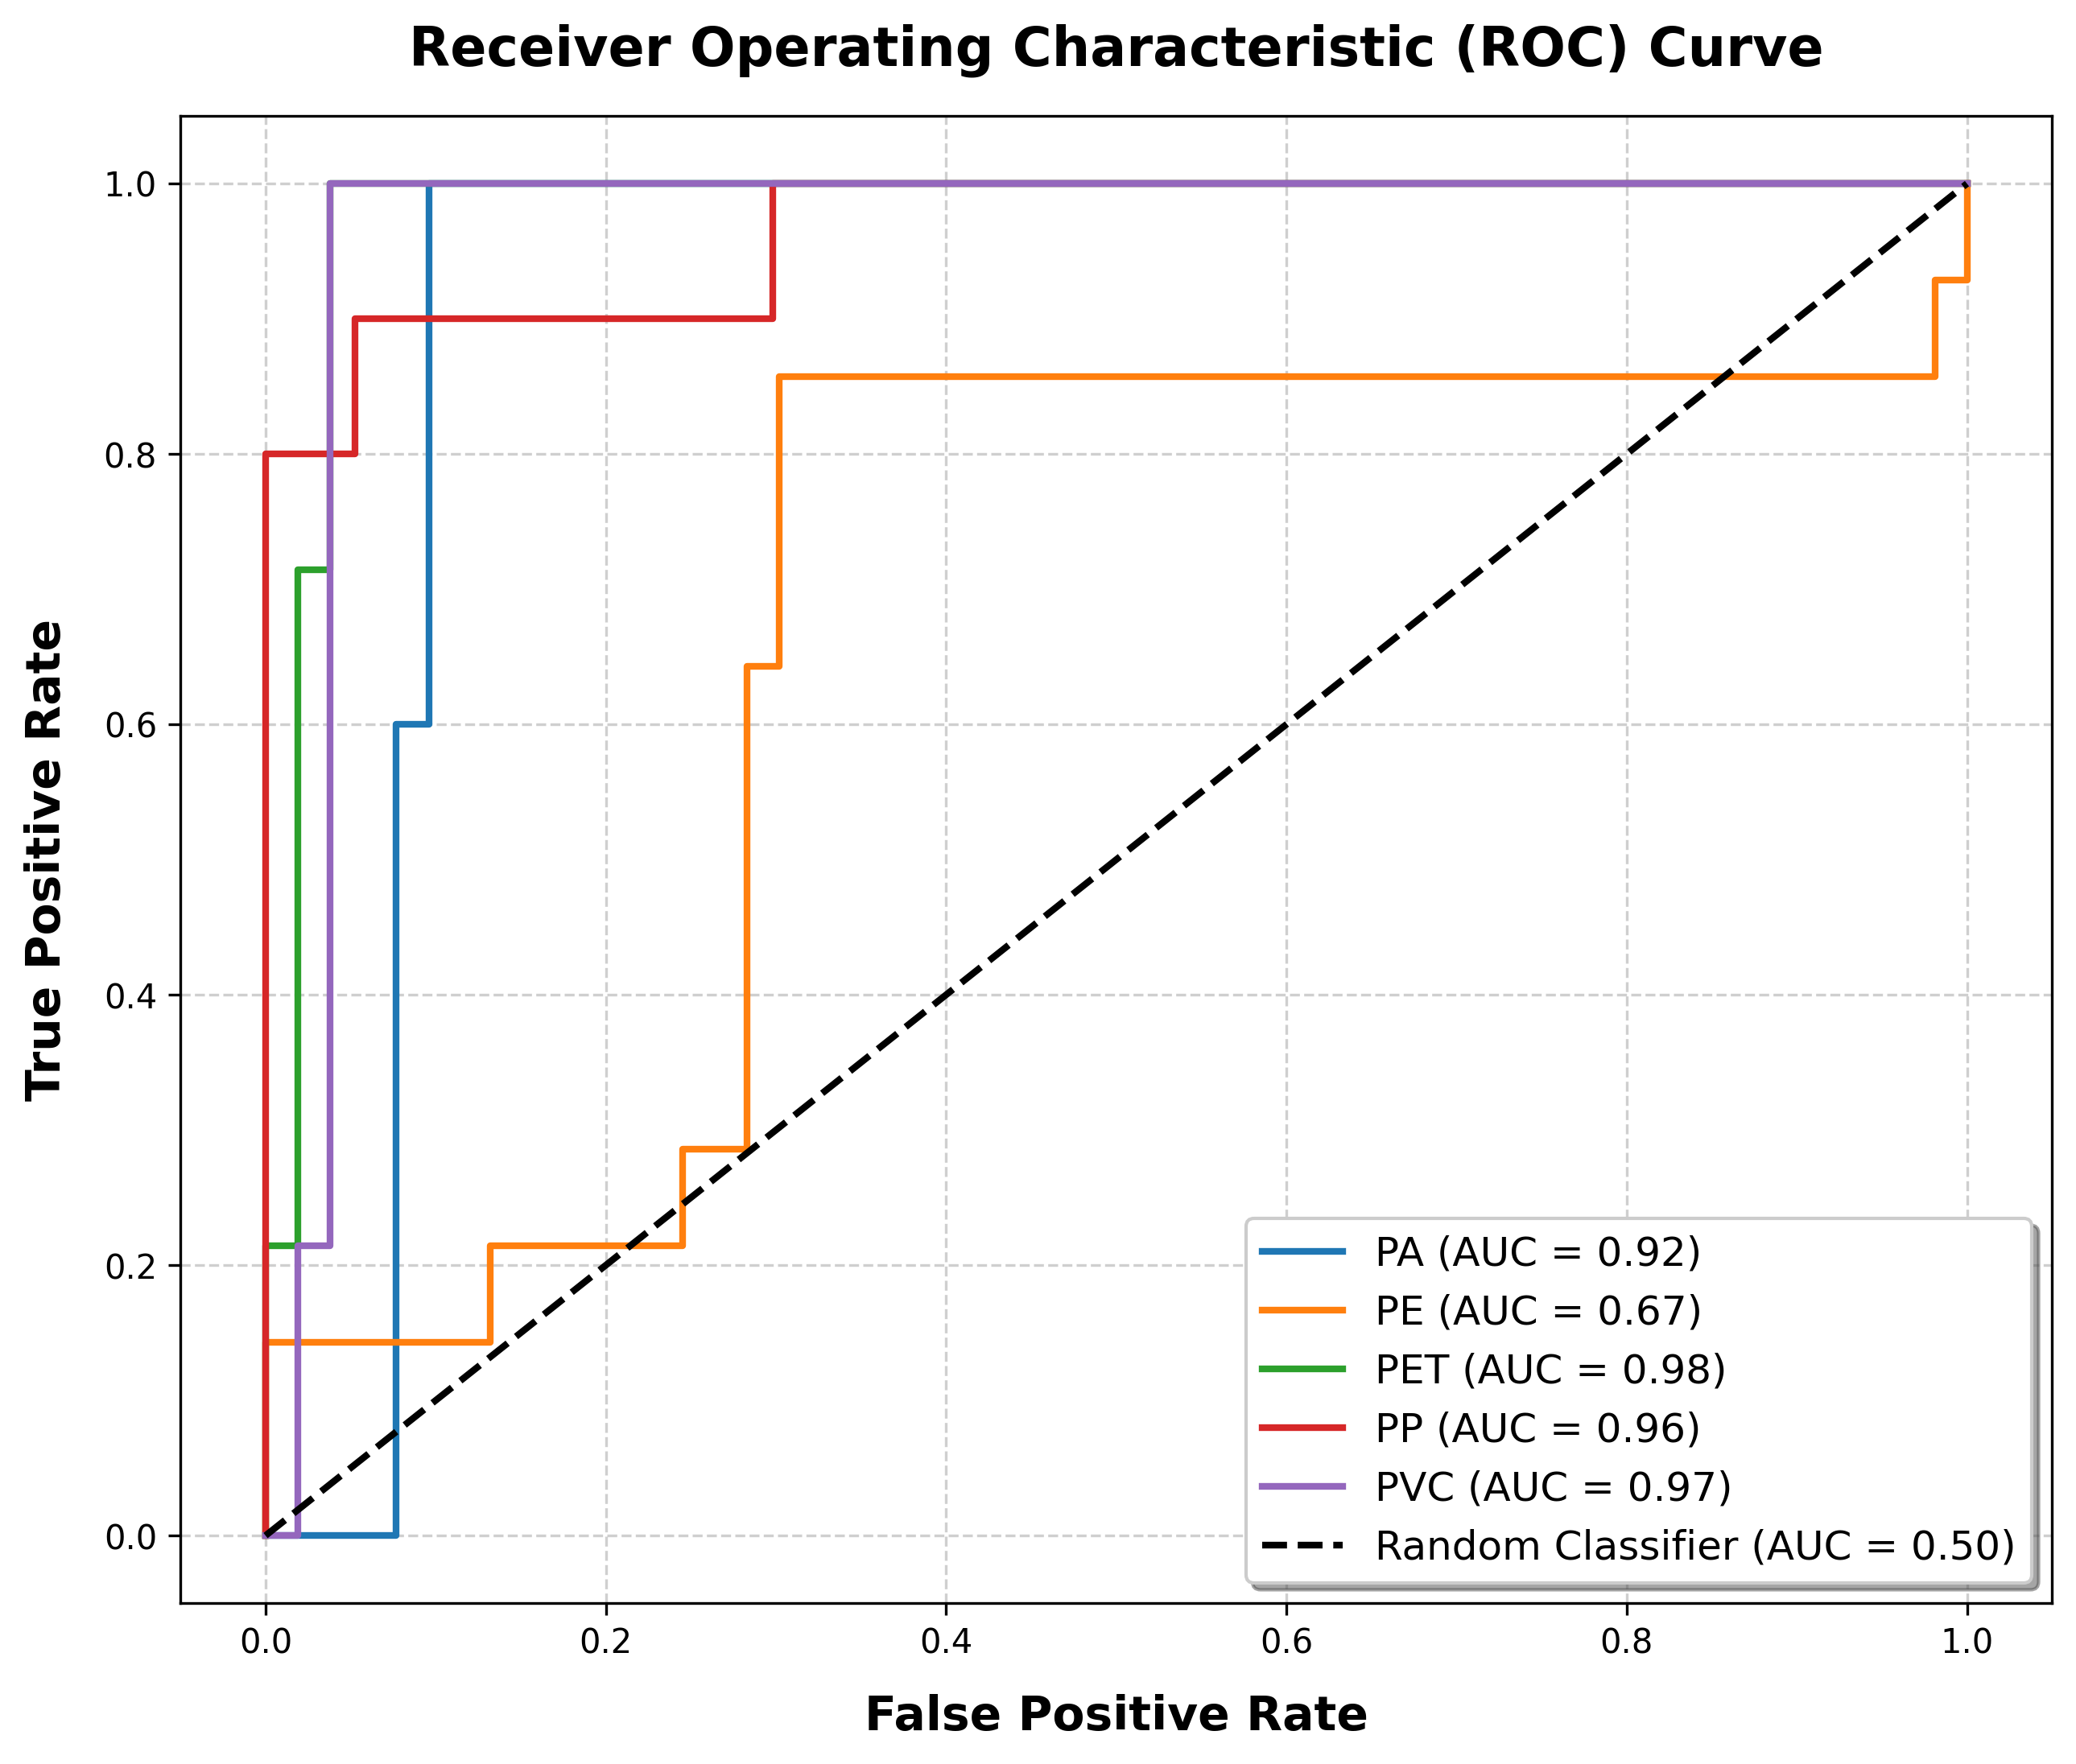

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the labels
y_test_binarized = label_binarize(y_test.numpy(), classes=np.arange(num_classes))
y_pred_prob = torch.softmax(y_pred_test, dim=1).numpy()

# Define colors for better distinction
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

# Create a high-resolution figure
plt.figure(figsize=(10, 8), dpi=300)

# Plot ROC curves for each class
for i, color in zip(range(num_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f"{class_labels[i]} (AUC = {roc_auc:.2f})")

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], "k--", lw=2, label="Random Classifier (AUC = 0.50)")

# Labels & Title
plt.xlabel("False Positive Rate", fontsize=14, fontweight="bold", labelpad=10)
plt.ylabel("True Positive Rate", fontsize=14, fontweight="bold", labelpad=10)
plt.title("Receiver Operating Characteristic (ROC) Curve", fontsize=16, fontweight="bold", pad=15)

# Customize legend
plt.legend(fontsize=12, loc="lower right", frameon=True, shadow=True, fancybox=True)

# Add grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()


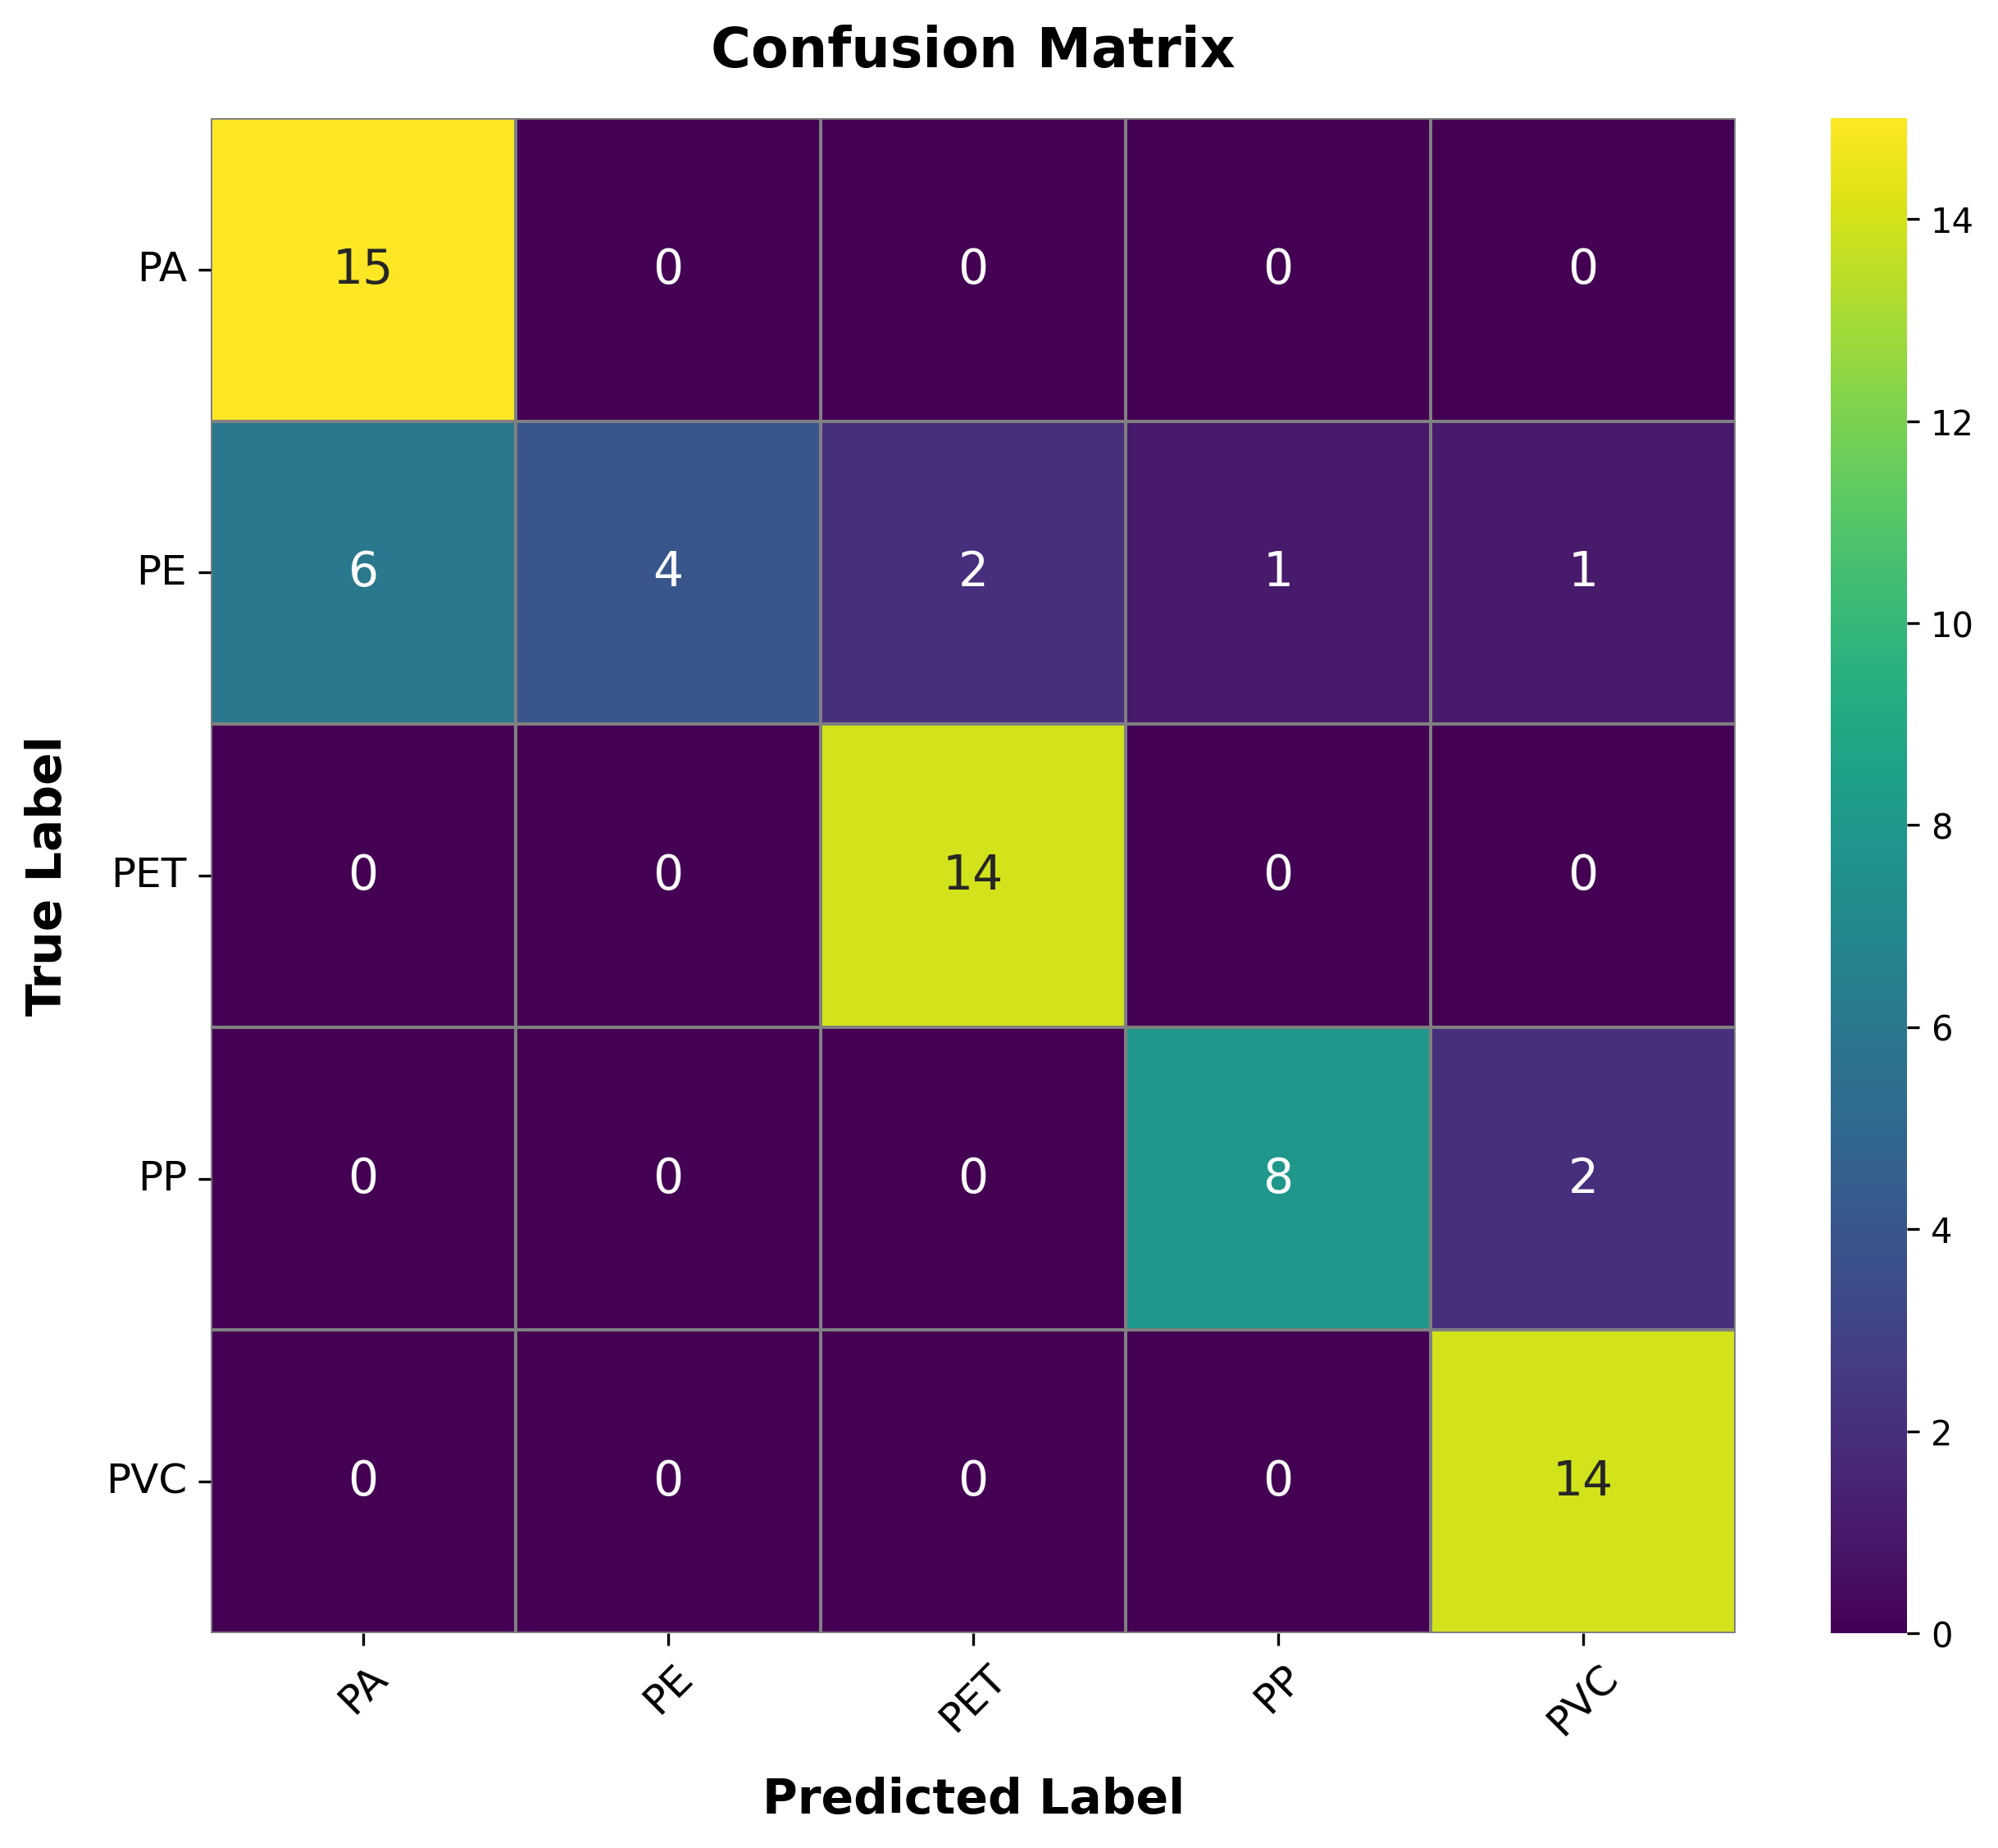

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test.numpy(), predicted_labels_test.numpy())

# Define class labels from encoder
class_labels = encoder.classes_

# Create a high-resolution figure
plt.figure(figsize=(10, 8), dpi=300)

# Plot Confusion Matrix with enhanced styling
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis",
            xticklabels=class_labels, yticklabels=class_labels,
            linewidths=0.5, linecolor="gray", cbar=True, annot_kws={"size": 14})

# Add Labels and Title with Improved Font Styling
plt.xlabel("Predicted Label", fontsize=14, fontweight="bold", labelpad=10)
plt.ylabel("True Label", fontsize=14, fontweight="bold", labelpad=10)
plt.title("Confusion Matrix", fontsize=16, fontweight="bold", pad=15)

# Customize tick labels
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)

# Show the plot
plt.show()


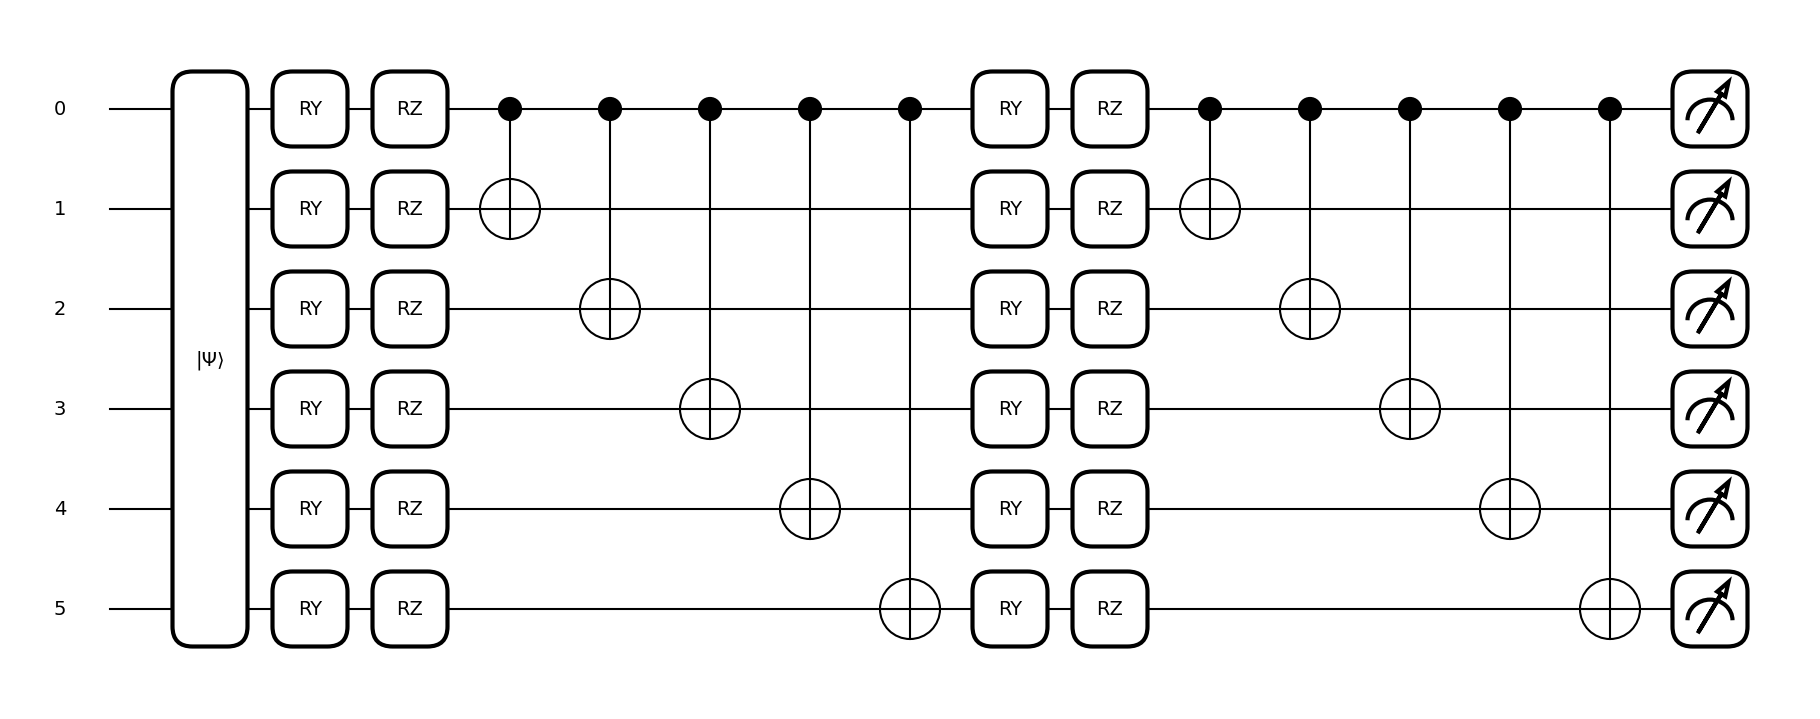

In [50]:
# --- QUANTUM CIRCUIT DIAGRAM (Graphical) ---
import matplotlib.pyplot as plt

# Generate a random 6-element input and pad it to 64 elements
input_vector = torch.rand(num_qubits)  # 6 elements
target_dim = 2 ** num_qubits           # 64 elements required

# Pad with zeros if necessary
if input_vector.shape[0] < target_dim:
    padding = torch.zeros(target_dim - input_vector.shape[0])
    input_vector = torch.cat((input_vector, padding))

# Convert model weights to NumPy
weights_numpy = model.q_weights.detach().numpy()

# Draw the circuit with properly sized input
fig, ax = qml.draw_mpl(quantum_circuit)(input_vector, weights_numpy)
plt.show()


In [52]:
# Ensure model is in evaluation mode
model.eval()

# Compute validation loss on test set
with torch.no_grad():
    y_val_pred = model(X_test)
    val_loss_values = [loss_fn(y_val_pred, y_test).item()] * len(loss_values)  # Repeat same loss for all epochs

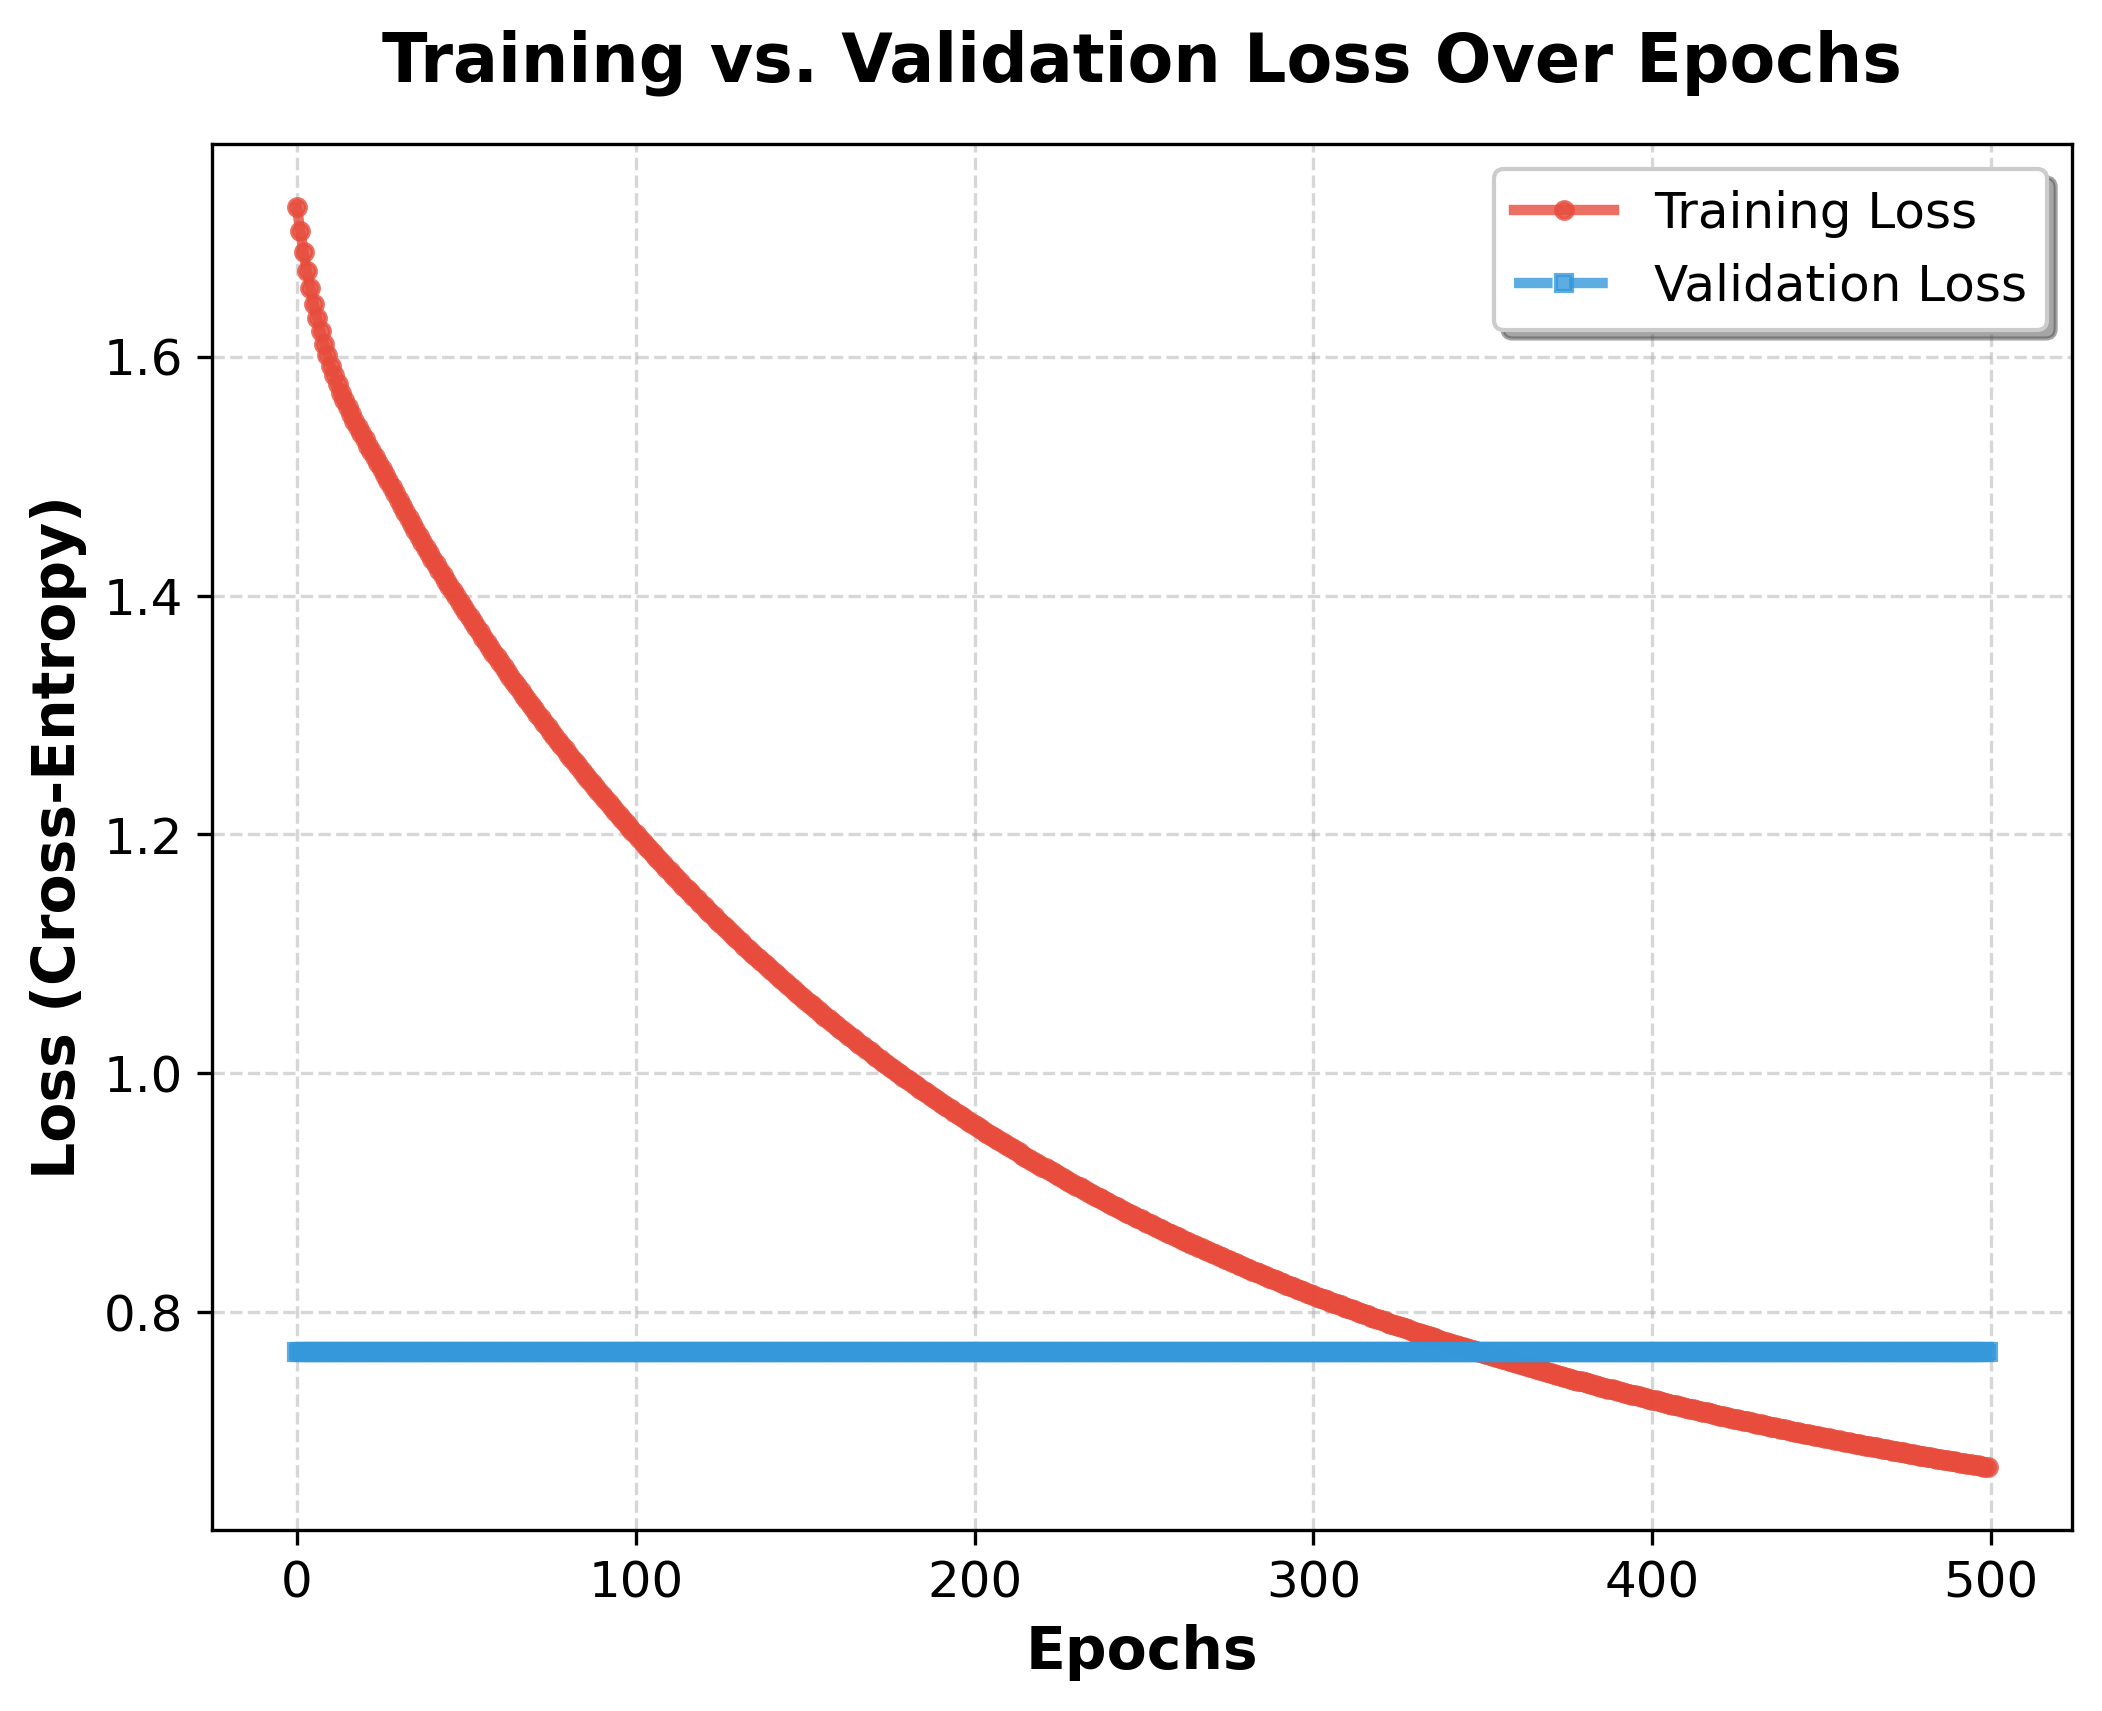

In [53]:
import matplotlib.pyplot as plt

# Create the figure with high resolution for publication
plt.figure(figsize=(8, 6), dpi=300)

# Plot Training Loss with smoother line
plt.plot(loss_values, label="Training Loss", color="#E74C3C", linewidth=2.5, marker="o", markersize=4, alpha=0.8)

# Plot Estimated Validation Loss with dashed line
plt.plot(val_loss_values, label="Validation Loss", color="#3498DB", linestyle="--", linewidth=2.5, marker="s", markersize=4, alpha=0.8)

# Set labels with LaTeX-like formatting
plt.xlabel("Epochs", fontsize=14, fontweight="bold")
plt.ylabel("Loss (Cross-Entropy)", fontsize=14, fontweight="bold")

# Set title with larger font
plt.title("Training vs. Validation Loss Over Epochs", fontsize=16, fontweight="bold", pad=15)

# Customize axes ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid with better styling
plt.grid(True, linestyle="--", alpha=0.5)

# Add a legend with improved visibility
plt.legend(fontsize=12, loc="upper right", frameon=True, shadow=True, fancybox=True)

# Show the plot
plt.show()


In [54]:
print(f"Number of shots used: {dev.shots}")

Number of shots used: Shots(total=None)


In [55]:
# --- MODEL WEIGHTS ---
print("\nModel Weights:")
print(model.q_weights.detach().numpy())



Model Weights:
[[ 0.02098787 -0.00588554  0.01271584 -0.0258222  -0.01807166  0.0074543 ]
 [ 0.01112805 -0.00252963 -0.00893455 -0.00230183  0.00244252 -0.01099938]]


In [57]:
# Save the trained model weights
model_path = "quantum_model.pth"
torch.save(model.state_dict(), model_path)
print(f"Model weights saved to {model_path}")

Model weights saved to quantum_model.pth


In [58]:
# from google.colab import files
# files.download(model_path)

In [59]:
# checkpoint = {
#     "epoch": epochs,  # Last epoch number
#     "model_state": model.state_dict(),  # Model weights
#     "optimizer_state": optimizer.state_dict(),  # Optimizer state
# }

# torch.save(checkpoint, "quantum_model_deepSave.pth")  # Save everything
# print("Quantum model saved successfully!")


In [60]:
checkpoint = {
    "epoch": epochs,  # Last epoch number
    "model_state": model.state_dict(),  # Model weights
    "optimizer_state": optimizer.state_dict(),  # Optimizer state
    "loss_values": loss_values,  # Save loss history
    "accuracy_values": accuracy_values,  # Save accuracy history
}

torch.save(checkpoint, "quantum_model_deepSave.pth")  # Save all in one file
print("✅ Quantum model & training history saved successfully!")


✅ Quantum model & training history saved successfully!


In [61]:
import torch

checkpoint = {
    "epoch": epochs,  # Last epoch number
    "model_class": model.__class__.__name__,  # Save model class name
    "model_state": model.state_dict(),  # Model weights
    "optimizer_state": optimizer.state_dict(),  # Optimizer state
    # "scheduler_state": scheduler.state_dict() if scheduler else None,  # LR scheduler (optional)
    "loss_values": loss_values,  # Loss history
    "accuracy_values": accuracy_values,  # Accuracy history
    "gradient_norms": [p.grad.norm().item() for p in model.parameters() if p.grad is not None],  # Gradients (optional)
    "hyperparameters": {
        "learning_rate": optimizer.param_groups[0]["lr"],
        "batch_size": batch_size,
        "num_epochs": epochs,
        "architecture": str(model),
    },  # Store hyperparameters
}

torch.save(checkpoint, "quantum_model_full_save.pth")  # Save all in one file
print("✅ Full model, training history, and hyperparameters saved successfully!")


✅ Full model, training history, and hyperparameters saved successfully!


## usage

In [62]:
# # Reinitialize model and optimizer
# model = QuantumClassifier()
# optimizer = Adam(model.parameters(), lr=learning_rate)

# # Load checkpoint
# checkpoint = torch.load("quantum_model.pth")
# model.load_state_dict(checkpoint["model_state"])
# optimizer.load_state_dict(checkpoint["optimizer_state"])
# start_epoch = checkpoint["epoch"]  # Resume from last epoch

# model.eval()  # Set to evaluation mode
# print(f"Model loaded. Resuming from epoch {start_epoch}.")

import torch
from tabulate import tabulate

# Load checkpoint
checkpoint = torch.load("quantum_model_deepSave.pth")

# Load model and set to evaluation mode
model = QuantumClassifier()
model.load_state_dict(checkpoint["model_state"])
model.eval()

# Extract training history
loss_values = checkpoint["loss_values"]
accuracy_values = checkpoint["accuracy_values"]
epochs = checkpoint["epoch"]

# Prepare data for tabular display (Epoch starts from 1 instead of 0)
table_data = [[epoch + 1, f"{loss_values[epoch]:.4f}", f"{accuracy_values[epoch]:.2f}%"]
              for epoch in range(len(loss_values))]

# Print formatted table
print("\n📌 Training Progress Overview:\n")
print(tabulate(table_data, headers=["Epoch", "Loss", "Accuracy"], tablefmt="grid"))

# Save to file for publication (Optional)
with open("training_log.txt", "w") as f:
    f.write(tabulate(table_data, headers=["Epoch", "Loss", "Accuracy"], tablefmt="grid"))

print("\n✅ Training log saved as 'training_log.txt' for publication!")


📌 Training Progress Overview:

+---------+--------+------------+
|   Epoch |   Loss | Accuracy   |
+=========+========+============+
|       1 | 1.725  | 21.27%     |
+---------+--------+------------+
|       2 | 1.7052 | 21.27%     |
+---------+--------+------------+
|       3 | 1.6873 | 21.27%     |
+---------+--------+------------+
|       4 | 1.6713 | 21.27%     |
+---------+--------+------------+
|       5 | 1.657  | 21.27%     |
+---------+--------+------------+
|       6 | 1.644  | 21.27%     |
+---------+--------+------------+
|       7 | 1.6321 | 21.27%     |
+---------+--------+------------+
|       8 | 1.621  | 21.27%     |
+---------+--------+------------+
|       9 | 1.6108 | 21.27%     |
+---------+--------+------------+
|      10 | 1.6012 | 21.27%     |
+---------+--------+------------+
|      11 | 1.5924 | 21.27%     |
+---------+--------+------------+
|      12 | 1.5843 | 28.36%     |
+---------+--------+------------+
|      13 | 1.5768 | 42.16%     |
+---------+-----